# Propensity to buy Term Deposit

# EDA on the Dataset

In [23]:
#Change directory and load catalog and pipeline from Kedro
%cd "D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model"
%reload_kedro

D:\University\CST4090 - Thesis\Propensity Model\thesis-propensity-model


[10/09/22 16:57:38] INFO     No path argument was provided. Using: D:\University\CST4090 -            ]8;id=716259;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=897365;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#55\55]8;;\
                             Thesis\Propensity Model\thesis-propensity-model                                       

[10/09/22 16:57:39] INFO     Kedro project thesis_propensity_model                                    ]8;id=972064;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=94311;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#78\78]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and 'pipelines'  ]8;id=573617;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=236808;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#79\79]8;;\

                    INFO     Registered line magic 'reload_kedro_mlflow'                              ]8;id=187295;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=141372;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

                    INFO     Registered line magic 'run_viz'                                          ]8;id=259923;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py\ipython.py]8;;\:]8;id=75800;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\extras\extensions\ipython.py#85\85]8;;\

In [24]:
#Loading packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import FactorAnalysis
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [25]:
#Load the Raw Dataset
bank_raw=catalog.load("bank_raw")

                    INFO     Loading data from 'bank_raw' (CSVDataSet)...                       ]8;id=728094;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=425609;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [26]:
#Check number of columns and rows of dataset
bank_raw.shape

(41188, 21)

In [27]:
#See column names of the dataset
bank_raw.columns.to_list()

[
    'age',
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed',
    'y'
]

In [28]:
#Verify top rows of the dataframe
bank_raw.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
#Describe the dataframe and understand the field distribution
bank_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
bank_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [31]:
bank_raw.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [32]:
#Check for nulls
bank_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [33]:
#Loop through all columns and print unique value counts
for col in bank_raw.columns:
        print(col)
        print(bank_raw[col].value_counts(),end="\n")


age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
housing
yes        21576
no         18622
unknown      990
Name: hou

In [34]:
#Description of the columns
bank_raw.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Demographics

age - client's age in years (numeric)

job - type of job (categorical: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)

marital - marital status (categorical: divorced, married, single, unknown)

education - client's education (categorical: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown)


Financial/product Holding

default - has credit in default? (categorical: no, yes, unknown)

housing - has housing loan? (categorical: no, yes, unknown)

loan - has personal loan? (categorical: no, yes, unknown)


Previous campaign details

contact - contact communication type (categorical: cellular, telephone)

month - last contact month of the year (categorical: jan, feb, mar, ..., nov, dec)

day_of_week - last contact day of the week (categorical: mon, tue, wed, thu, fri)

duration - last contact duration, in seconds (numeric).

campaign - number of contacts performed and for this client during this campaign (numeric, includes the last contact)

pdays - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the 
client has not been previously contacted)

previous - number of contacts performed for this client before this campaign (numeric)

poutcome - outcome of the previous marketing campaign (categorical: failure, nonexistent, success)


Indicators

emp.var.rate - employment variation rate, quarterly indicator (numeric)

cons.price.idx - consumer price index, monthly indicator (numeric)

cons.conf.idx - consumer confidence index, monthly indicator (numeric)

euribor3m - euribor 3 month rate, daily indicator (numeric)

nr.employed - number of employees, quarterly indicator (numeric)


Output feature (desired target):

y - has the client subscribed a term deposit? (binary: yes,no)

In [35]:
#Rename the target column and create new encoded column for target
bank_raw.rename(columns={'y':'deposit'},inplace=True)
dict_target = {"no": 0, "yes": 1}
bank_raw["deposit_encoded"] = bank_raw["deposit"].map(dict_target)
bank_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,deposit_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [36]:
#Print share of customers with term deposit
print("Share of customers with term deposit =", '{:.1%}'.format(bank_raw["deposit_encoded"].mean()))

Share of customers with term deposit = 11.3%


In [37]:
#Count of Customers with and without deposit
bank_raw["deposit"].value_counts()

no     36548
yes     4640
Name: deposit, dtype: int64

From a business perspective, the number of active customers holding deposit is very less which is not good for the bank as liabilities/deposits lead to balance the books. 

From modelling perspective, the target class is imbalanced and needs to be taken care while model training 

In [38]:
bank_raw[bank_raw["deposit_encoded"] == 1].mean() 

age                  40.913147
duration            553.191164
campaign              2.051724
pdays               792.035560
previous              0.492672
emp.var.rate         -1.233448
cons.price.idx       93.354386
cons.conf.idx       -39.789784
euribor3m             2.123135
nr.employed        5095.115991
deposit_encoded       1.000000
dtype: float64

In [39]:
bank_raw[bank_raw["deposit_encoded"] == 0].mean() 

age                  39.911185
duration            220.844807
campaign              2.633085
pdays               984.113878
previous              0.132374
emp.var.rate          0.248875
cons.price.idx       93.603757
cons.conf.idx       -40.593097
euribor3m             3.811491
nr.employed        5176.166600
deposit_encoded       0.000000
dtype: float64

# Data Visualization

<seaborn.axisgrid.FacetGrid object at 0x0000025D486D1F90>

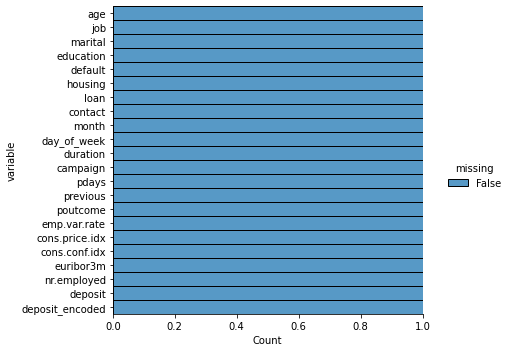

In [40]:
plt.figure(figsize=(10,6))
sns.displot(
    data=bank_raw.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [41]:
bank_raw

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit,deposit_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


<seaborn.axisgrid.FacetGrid object at 0x0000025D486D0AF0>

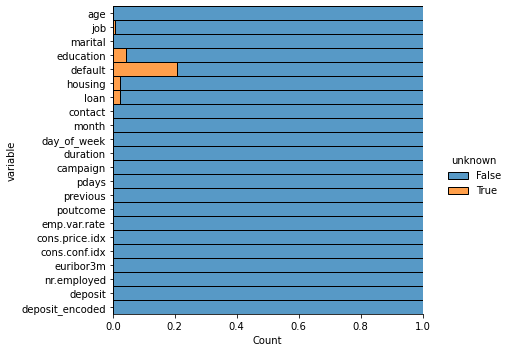

In [42]:
plt.figure(figsize=(10,6))
sns.displot(
    data=bank_raw.replace('unknown', np.nan).isna().melt(value_name="unknown"),
    y="variable",
    hue="unknown",
    multiple="fill",
    aspect=1.25
)

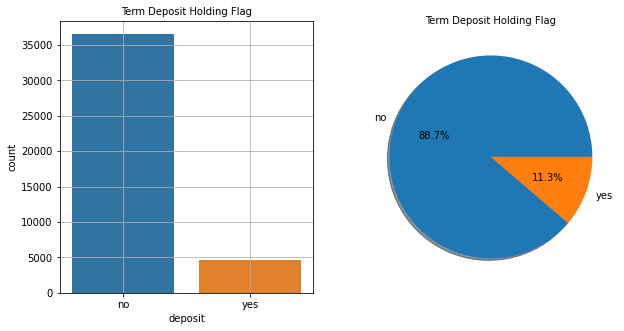

In [43]:
#Target Product Holding Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x='deposit',data=bank_raw)
plt.title("Term Deposit Holding Flag",size = 10)
plt.grid()
plt.subplot(1,2,2)
labels =bank_raw['deposit'].value_counts(sort = True).index
sizes = bank_raw['deposit'].value_counts(sort = True)
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Term Deposit Holding Flag',size = 10)
plt.show()

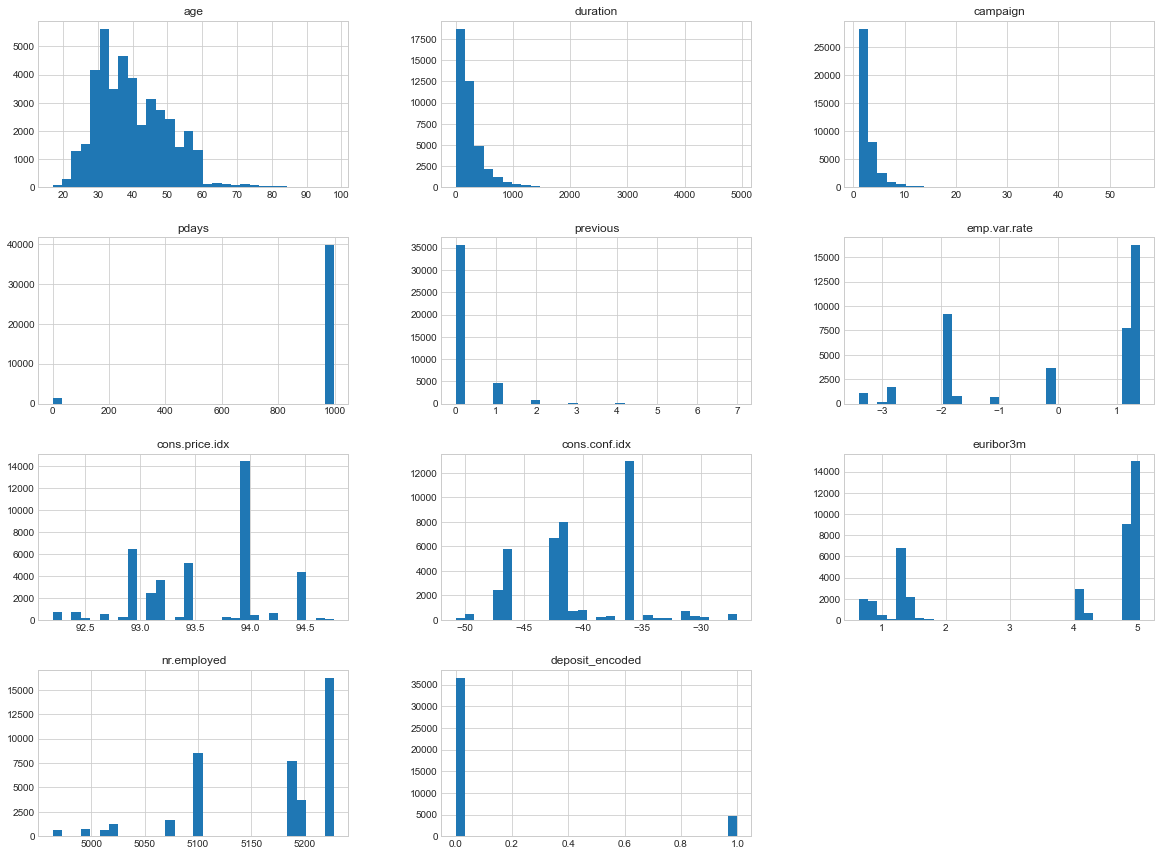

In [44]:
plt.style.use('seaborn-whitegrid')

bank_raw.hist(bins=30, figsize=(20,15))
plt.show()

In [45]:
#Plot Numerical features and categorical as boxplot and countplot

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorics=['object']

bank_raw_cat = bank_raw.select_dtypes(include=categorics)
bank_raw_num = pd.concat([bank_raw.select_dtypes(include=numerics),bank_raw[['deposit']]],axis=1)

bank_raw_num_columns=bank_raw.select_dtypes(include=numerics)

print(bank_raw_cat.columns)
print(bank_raw_num.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'deposit_encoded', 'deposit'],
      dtype='object')


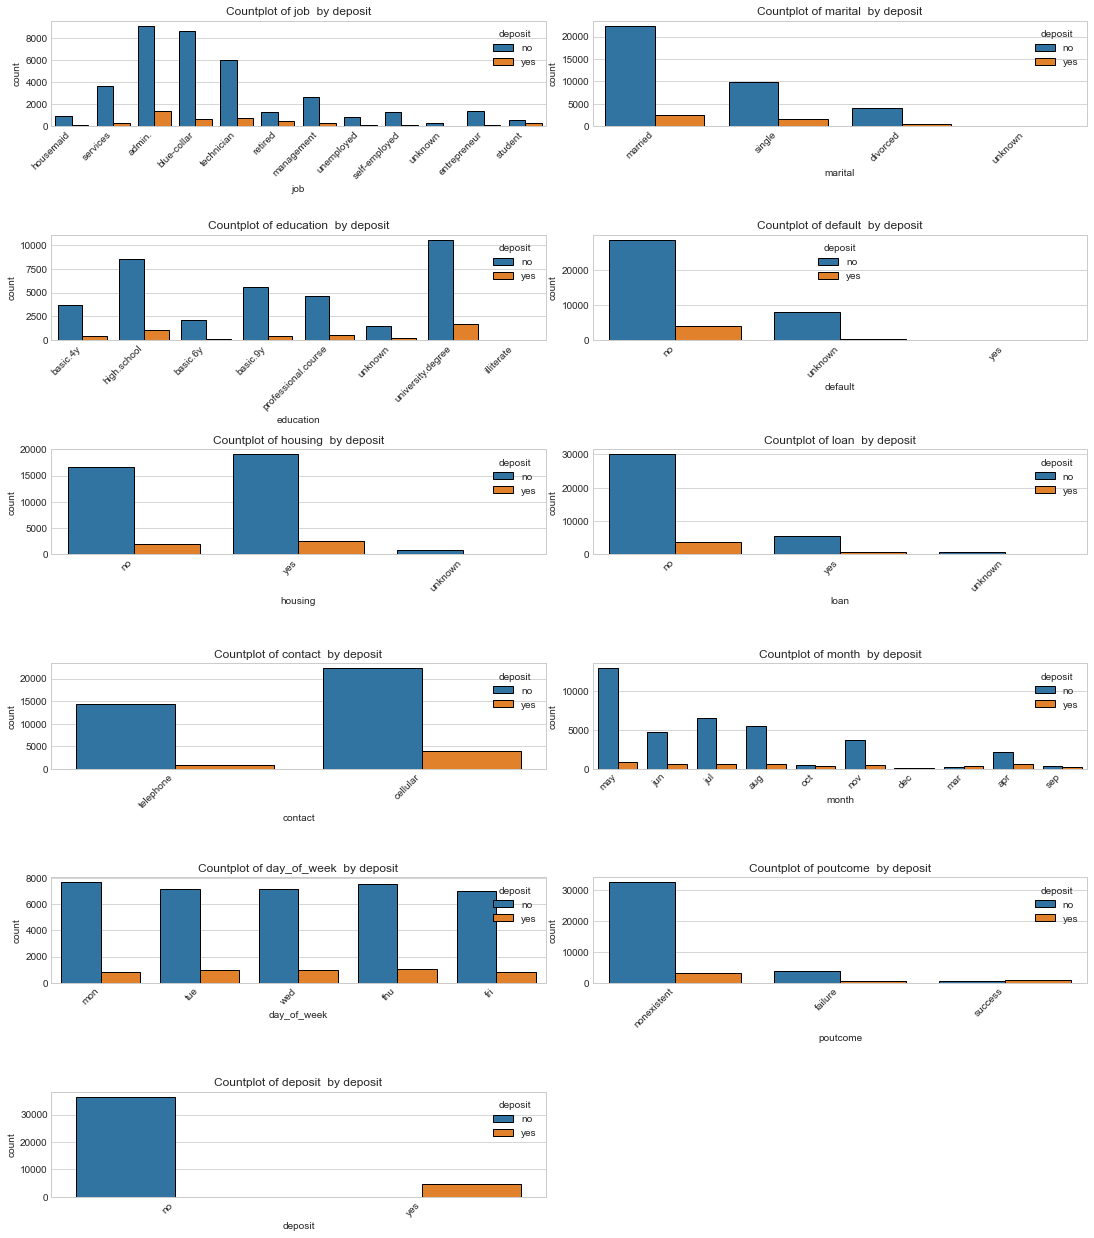

In [46]:
#Plot categorical features
plt.figure(figsize=(15,17))
for i,cat_fea in enumerate(bank_raw_cat):
    plt.subplot(6,2,i+1)
    chart=sns.countplot(x=cat_fea,hue='deposit',data=bank_raw_cat,edgecolor="black")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.title("Countplot of {}  by deposit".format(cat_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

The Imbalanced nature of term deposit holding makes it difficult to get insights from the countplot, lets understand how boxplot is able to segregate feature for the target variable

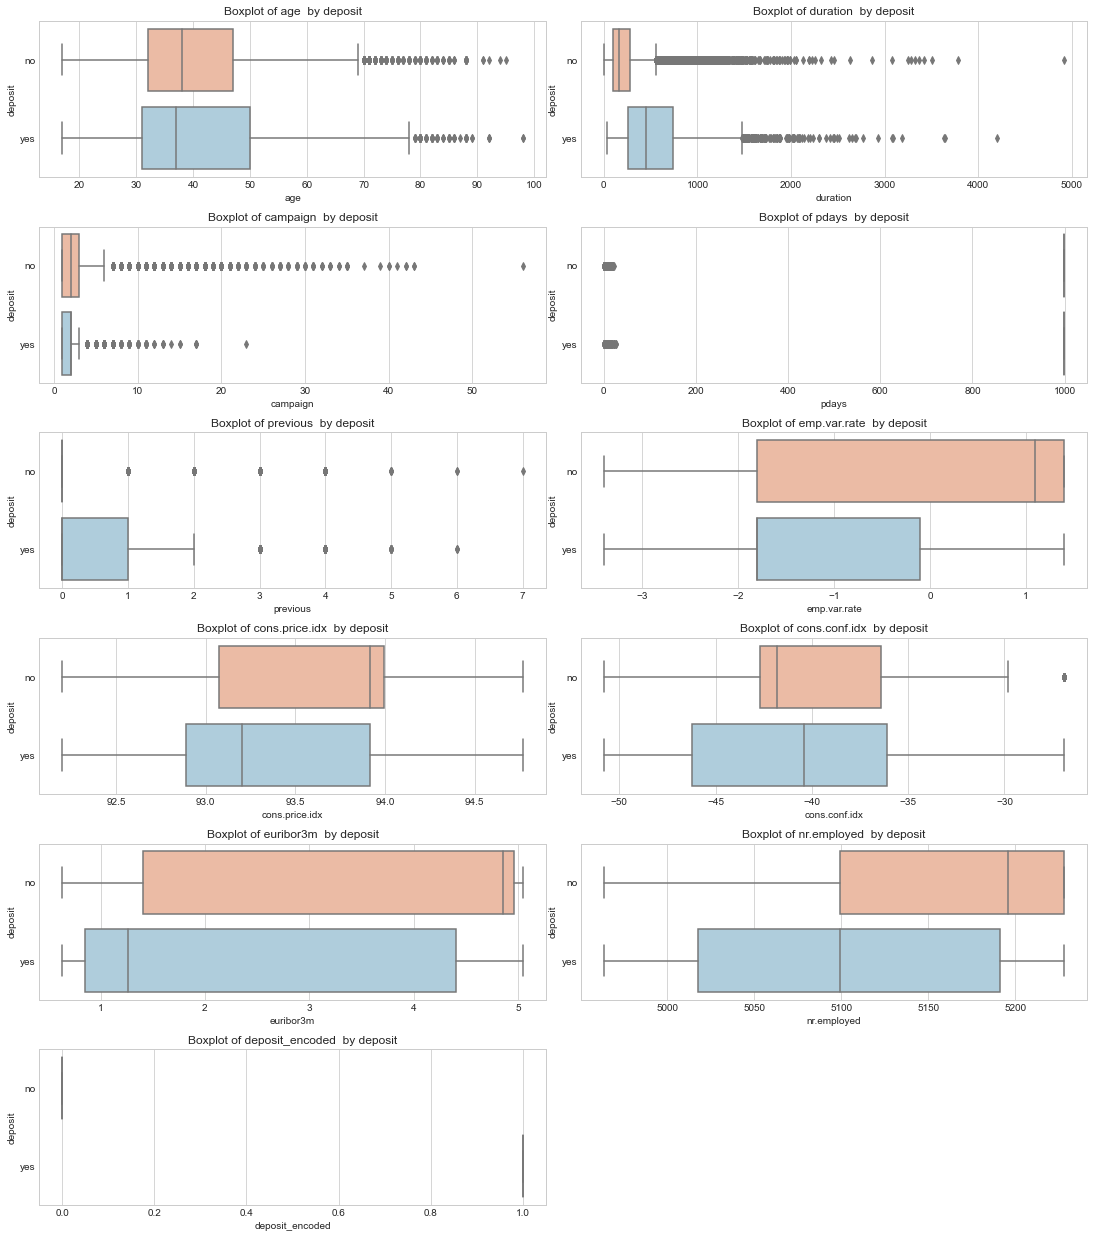

In [47]:
#Plot Numerical features
plt.figure(figsize=(15,17))
for i,num_fea in enumerate(bank_raw_num_columns):
    plt.subplot(6,2,i+1)
    chart=sns.boxplot(x=num_fea,y='deposit',data=bank_raw_num,palette="RdBu")
    plt.title("Boxplot of {}  by deposit".format(num_fea))
plt.tight_layout(pad=0., w_pad=0.3, h_pad=1.0)    
plt.show()

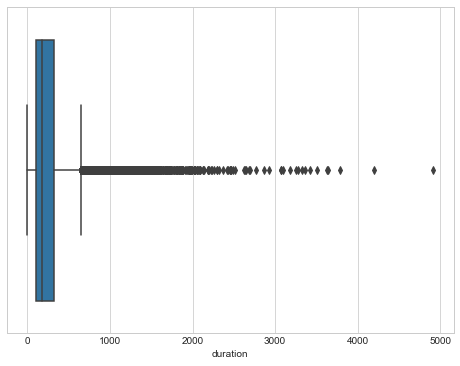

In [48]:
sns.boxplot(x=bank_raw["duration"])

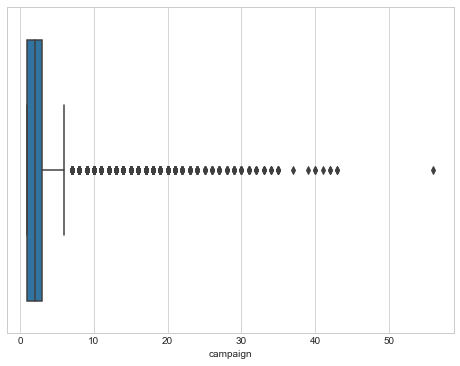

In [49]:
sns.boxplot(x=bank_raw["campaign"])

We see the duration and previous contact to customer has definitely led to more suscriptions to product

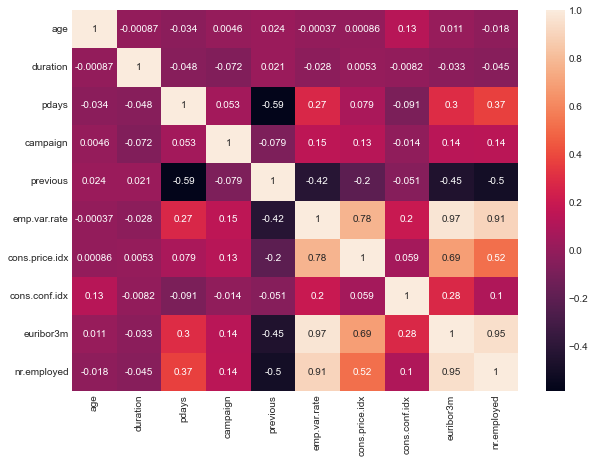

In [50]:
#Correlation Heatmap
bank_raw_df = bank_raw[['age', 'duration', 'pdays', 'campaign', 'previous','emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_raw_df.corr(), annot=True)
plt.show()

the feature "previous" seems to have have high correlation with pdays and all the economic indicators have high correlation to each other and may lead to multicollinearity issue.

In [51]:
checkdf=bank_raw[['pdays','previous']]

In [52]:
checkdf.pivot_table(index='pdays', columns='previous', 
                        aggfunc=len, fill_value=0)

previous,0,1,2,3,4,5,6,7
pdays,,,,,,,,
0,0,7,4,2,1,1,0,0
1,0,16,5,3,1,0,1,0
2,0,42,12,3,3,1,0,0
3,0,250,114,43,19,9,3,1
4,0,73,29,14,2,0,0,0
5,0,28,11,5,0,2,0,0
6,0,220,117,57,16,2,0,0
7,0,26,23,8,3,0,0,0
8,0,9,6,2,1,0,0,0


The correlation is due to 34521 customers not contacted so comes in pdays(999) and previous contact 0. So pdays can be removed as previous is a stronger feature.

# Preprocessing Data

In [53]:
#Duration and campaign has most outliers and needs to be treated

#Duration 1500 based on boxplot and campaign of 10

bank_int=bank_raw[~(bank_raw['campaign']>10)]
bank_int=bank_int[~(bank_int['duration']>1500)]



# cols = ['duration','campaign'] 

# # Calculate quantiles and IQR
# Q1 = df[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
# Q3 = df[cols].quantile(0.75)
# IQR = Q3 - Q1

# # Return a boolean array of the rows with (any) non-outlier column values
# condition = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# # Filter our dataframe based on condition
# filtered_df = df[condition]

In [54]:
#Drop pdays and the encoded deposit
bank_int = bank_int.drop(columns=['pdays', 'deposit_encoded'])

In [55]:
bank_int.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [56]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Imputation of data

In [57]:
#Education, default, marital, housing and loan have unknown in them
#education, 4% unknown and no clear major value, so knn imputation
#default, also mode as predominantly (80%) is no
#marital represent 0.2% and can be replaced by mode (married)
#Housing,knn imputation
#Loan,mode (no)


bank_int[['education','default','marital','housing','loan']] = bank_int[['education','default','marital','housing','loan']].replace('unknown', np.nan)


In [58]:
#Check nan
bank_int['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

In [59]:
#Mode imputation
mode_col=['default','marital','loan','education','housing']
for col in mode_col:
    bank_int[col] = bank_int[col].fillna(bank_int[col].mode()[0])

In [60]:
bank_int['loan'].value_counts()

no     34036
yes     6080
Name: loan, dtype: int64

In [61]:
# # Knn imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=15)

# imputed = imputer.fit_transform(bank_int_cp['education'])
# # df_imputed = pd.DataFrame(imputed, columns=df.columns)


Taking care of Collinear features (Economic Indicators)

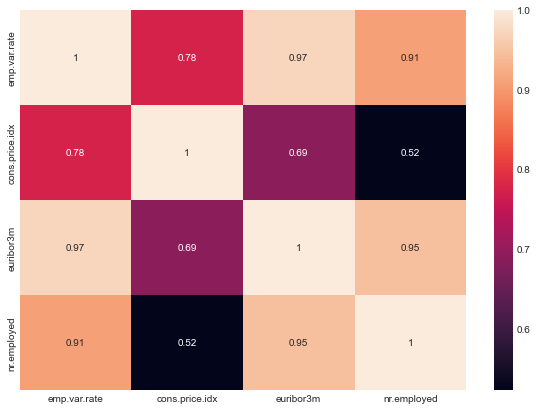

In [62]:
#Correlation Heatmap
bank_econind = bank_raw[['emp.var.rate','cons.price.idx', 'euribor3m', 'nr.employed']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_econind.corr(), annot=True)
plt.show()

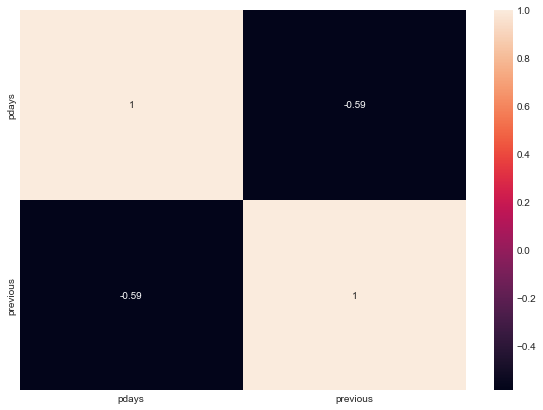

In [63]:
#Correlation Heatmap
bank_econind = bank_raw[['pdays','previous']]
plt.figure(figsize=(10,7))
sns.heatmap(data=bank_econind.corr(), annot=True)
plt.show()

In [64]:
factordf=bank_int[['emp.var.rate','cons.price.idx','euribor3m','nr.employed']]

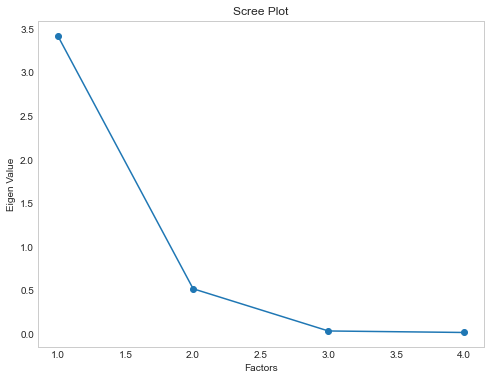

In [65]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=factordf.shape[1])
fa.fit(factordf)
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,factordf.shape[1]+1),ev)
plt.plot(range(1,factordf.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [66]:
bank_int["Economic_Indicators"]=FactorAnalysis(n_components=1).fit_transform(bank_int[['emp.var.rate',
                                                                                      'cons.price.idx',
                                                                                      'euribor3m','nr.employed']])

In [67]:
bank_int=bank_int.drop(['emp.var.rate','cons.price.idx','euribor3m','nr.employed'],axis=1)

In [68]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [69]:
bank_int.shape

(40116, 17)

In [70]:
#Remove duplicates

bank_int=bank_int.drop_duplicates()
bank_int.shape

(40102, 17)

In [71]:
bank_int.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,deposit,Economic_Indicators
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,no,-0.72125
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,no,-0.72125
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,no,-0.72125
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,no,-0.72125
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,no,-0.72125
5,45,services,married,basic.9y,no,no,no,telephone,may,mon,198,1,0,nonexistent,-36.4,no,-0.72125
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,-36.4,no,-0.72125
7,41,blue-collar,married,university.degree,no,no,no,telephone,may,mon,217,1,0,nonexistent,-36.4,no,-0.72125
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,0,nonexistent,-36.4,no,-0.72125
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,0,nonexistent,-36.4,no,-0.72125


In [72]:
from sklearn.preprocessing import LabelEncoder
#create dict for binary encoding
dic = {"yes":1,"no":0}
lst = ["deposit","loan","default","housing"]
for i in lst:
    bank_int[i] = bank_int[i].map(dic)

In [73]:
# Ordinal Encoding
l=['month',"day_of_week","contact","poutcome"]
le=LabelEncoder()
for i in l:
    bank_int[i]=le.fit_transform(bank_int[i].values)

In [74]:
# OneHot Encoding 
bank_int = pd.get_dummies(bank_int, columns = ['job','marital','education'])

In [75]:
bank_int.head(10)

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
5,45,0,0,0,1,6,1,198,1,0,...,0,1,0,0,0,1,0,0,0,0
6,59,0,0,0,1,6,1,139,1,0,...,0,1,0,0,0,0,0,0,1,0
7,41,0,0,0,1,6,1,217,1,0,...,0,1,0,0,0,0,0,0,0,1
8,24,0,1,0,1,6,1,380,1,0,...,0,0,1,0,0,0,0,0,1,0
9,25,0,1,0,1,6,1,50,1,0,...,0,0,1,0,0,0,1,0,0,0


In [76]:
bank_int=bank_int.reset_index()

In [77]:
bank_int.drop('index',axis=1,inplace=True)

In [78]:
bank_int

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,1,6,1,261,1,0,...,0,1,0,1,0,0,0,0,0,0
1,57,0,0,0,1,6,1,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,37,0,1,0,1,6,1,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,6,1,151,1,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,1,6,1,307,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40097,73,0,1,0,0,7,0,334,1,0,...,0,1,0,0,0,0,0,0,1,0
40098,46,0,0,0,0,7,0,383,1,0,...,0,1,0,0,0,0,0,0,1,0
40099,56,0,1,0,0,7,0,189,2,0,...,0,1,0,0,0,0,0,0,0,1
40100,44,0,0,0,0,7,0,442,1,0,...,0,1,0,0,0,0,0,0,1,0


In [79]:
bank_int['deposit'].value_counts()

0    35618
1     4484
Name: deposit, dtype: int64

In [80]:
X=bank_int.drop('deposit',axis=1)
Y=bank_int['deposit']

In [81]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [82]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=1)
for train_index,test_index in sss.split(X,Y):
    train_df = bank_int.loc[train_index]
    test_df = bank_int.loc[test_index]

In [83]:
print("Ratio for train dataset")
print(train_df['deposit'].value_counts()/train_df.shape[0])
print()
print("ratio for test dataset")
print(test_df['deposit'].value_counts()/test_df.shape[0])

Ratio for train dataset
0    0.888176
1    0.111824
Name: deposit, dtype: float64

ratio for test dataset
0    0.888205
1    0.111795
Name: deposit, dtype: float64


In [84]:
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

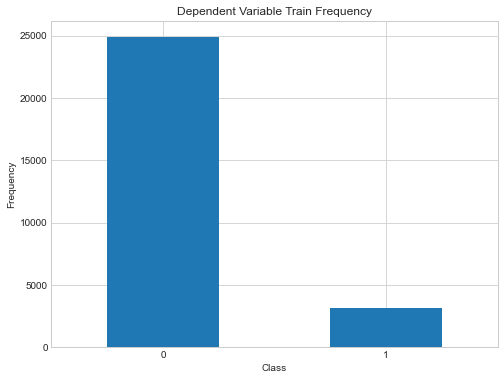

In [86]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

In [87]:
#Balance Train dataset
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_smote,Y_smote=smote.fit_resample(X_train, Y_train)

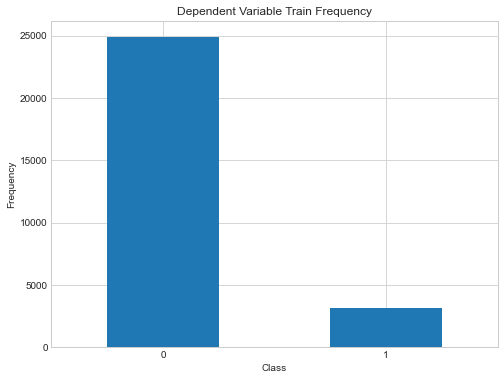

In [88]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_train,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

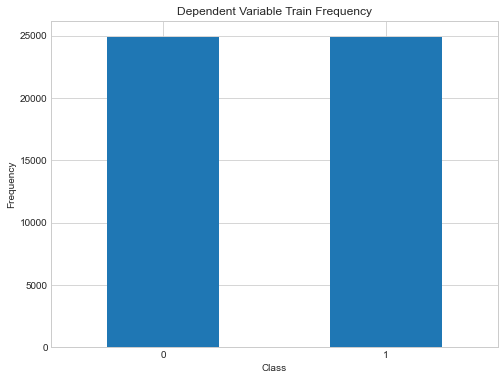

In [89]:
#Lets check the balance of the Target variable dataset (Whether the class have similar representation)
count_classes=pd.value_counts(Y_smote,sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title('Dependent Variable Train Frequency')
plt.xlabel("Class")
plt.ylabel("Frequency")

# Model Training

In [90]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [105]:
#Logistic Regression
lr= LogisticRegression()

lr.fit(X_smote,Y_smote)
Y_pred_lr = lr.predict(X_test)
y_train_predlr = lr.predict(X_smote)

print("Testing Accuracy of LogisticRegression : ",metrics.accuracy_score(Y_test,Y_pred_lr))
#print("Accuracy of LogisticRegression",pipe_lr.score(X_test,Y_test))

print("Training Accuracy of LogisticRegression : ",metrics.accuracy_score(y_train_predlr,Y_smote))

Testing Accuracy of LogisticRegression :  0.8692544260659961
Training Accuracy of LogisticRegression :  0.9077891865875181


In [106]:
print(classification_report(Y_test,Y_pred_lr))
print(confusion_matrix(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     10686
           1       0.44      0.61      0.51      1345

    accuracy                           0.87     12031
   macro avg       0.69      0.75      0.72     12031
weighted avg       0.89      0.87      0.88     12031

[[9642 1044]
 [ 529  816]]


In [107]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=5)

gb.fit(X_smote,Y_smote)
y_train_preds = gb.predict(X_smote)
y_test_preds = gb.predict(X_test_s)

print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.8883717064250686
The accuracy of the GB is 0.9376704636611584


In [108]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10686
           1       0.51      0.03      0.06      1345

    accuracy                           0.89     12031
   macro avg       0.70      0.52      0.50     12031
weighted avg       0.85      0.89      0.84     12031

[[10642    44]
 [ 1299    46]]


In [109]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=80, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)
xgb.fit(X_smote,Y_smote)

#calculate and print scores for the model
y_train_preds = xgb.predict(X_smote)
y_test_preds = xgb.predict(X_test)


print('The accuracy of the GB is',metrics.accuracy_score(Y_test,y_test_preds))
print('The accuracy of the GB is',metrics.accuracy_score(y_train_preds,Y_smote))

The accuracy of the GB is 0.9093175962097914
The accuracy of the GB is 0.9537141023584149


In [110]:
print(classification_report(Y_test,y_test_preds))
print(confusion_matrix(Y_test,y_test_preds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10686
           1       0.58      0.69      0.63      1345

    accuracy                           0.91     12031
   macro avg       0.77      0.81      0.79     12031
weighted avg       0.92      0.91      0.91     12031

[[10014   672]
 [  419   926]]


In [111]:
y_test_proba = xgb.predict_proba(X_test_s)

In [112]:
len(X_test_s[0])

35

In [113]:
len(y_test_proba)

12031

In [114]:
Y_test.value_counts()

0    10686
1     1345
Name: deposit, dtype: int64

In [115]:
X_columns=list(X_train.columns)

In [116]:
X_header=pd.DataFrame(X_test_s,columns=X_columns)

In [103]:
#Benchmarking across multiple classifiers

In [117]:
X_smote=catalog.load("X_smote")
Y_smote=catalog.load("Y_smote")
Y_test=catalog.load("Y_test")
X_test_scaled=catalog.load("X_test_scaled")

[10/09/22 17:04:33] INFO     Loading data from 'X_smote' (PickleDataSet)...                     ]8;id=212781;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=999515;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[10/09/22 17:04:34] INFO     Loading data from 'Y_smote' (PickleDataSet)...                     ]8;id=194778;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=236670;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'Y_test' (PickleDataSet)...                      ]8;id=149432;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=585176;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'X_test_scaled' (PickleDataSet)...               ]8;id=655148;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=640177;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

Scoring Parameter - accuracy
>lr 0.864 (0.005)
>knn 0.925 (0.004)
>svm 0.909 (0.004)
>bayes 0.555 (0.035)
>randomf 0.957 (0.003)
>xgb 0.951 (0.002)
>catb 0.952 (0.003)
>lgbm 0.951 (0.002)


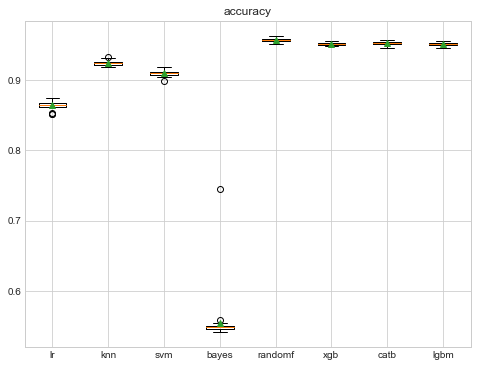

Scoring Parameter - precision
>lr 0.854 (0.007)
>knn 0.873 (0.006)
>svm 0.875 (0.006)
>bayes 0.534 (0.045)
>randomf 0.945 (0.004)
>xgb 0.953 (0.003)
>catb 0.954 (0.004)
>lgbm 0.948 (0.004)


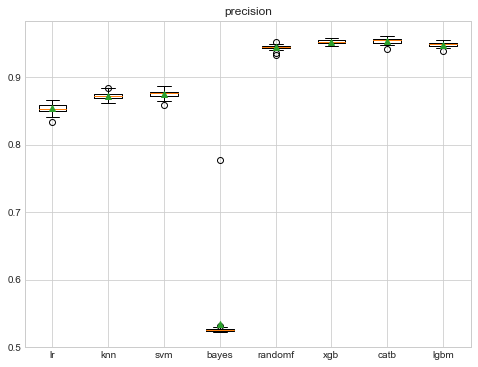

Scoring Parameter - recall
>lr 0.879 (0.005)
>knn 0.994 (0.002)
>svm 0.955 (0.004)
>bayes 0.984 (0.055)
>randomf 0.971 (0.003)
>xgb 0.950 (0.004)
>catb 0.951 (0.004)
>lgbm 0.954 (0.004)


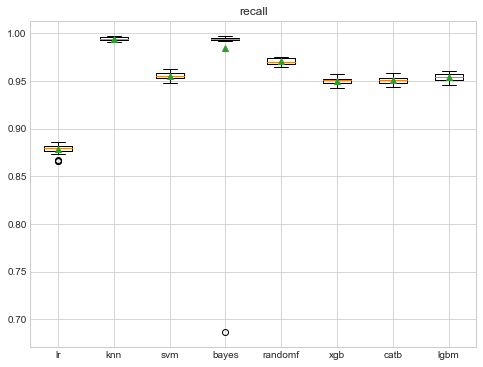

Scoring Parameter - f1
>lr 0.866 (0.005)
>knn 0.929 (0.003)
>svm 0.913 (0.004)
>bayes 0.689 (0.008)
>randomf 0.957 (0.003)
>xgb 0.951 (0.002)
>catb 0.952 (0.003)
>lgbm 0.951 (0.002)


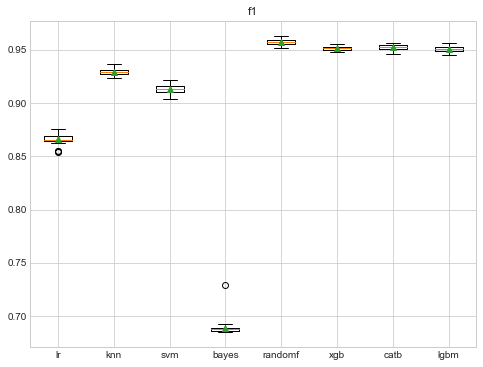

Scoring Parameter - roc_auc
>lr 0.930 (0.004)
>knn 0.968 (0.002)
>svm 0.962 (0.002)
>bayes 0.830 (0.006)
>randomf 0.994 (0.001)
>xgb 0.993 (0.001)
>catb 0.993 (0.001)
>lgbm 0.993 (0.001)


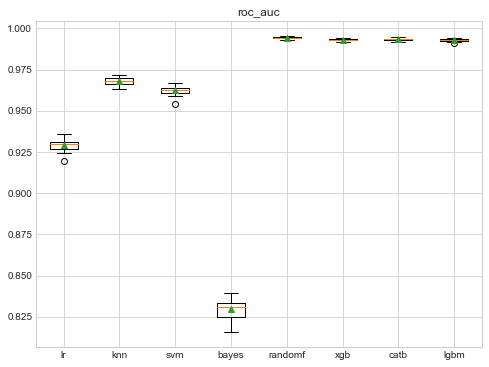

In [118]:
#Lets populate the accuracy of multiple models with a boxplot visualization to understand the spread and mean better
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#Boosting algorithms
import xgboost
import catboost as ctb
import lightgbm as lgb

from matplotlib import pyplot
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression(multi_class='ovr',random_state=42)
    models['knn'] = KNeighborsClassifier()
    models['svm'] = SVC(random_state=42)
    models['bayes'] = GaussianNB()
    models['randomf'] = RandomForestClassifier(random_state=42)
    models['xgb'] = xgboost.XGBClassifier(random_state=42)
    models['catb']=ctb.CatBoostClassifier(random_state=42)
    models['lgbm']=lgb.LGBMClassifier(random_state=42)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y,score):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring=score, cv=cv, n_jobs=-1, error_score=
    'raise')
    return scores
# get the models to evaluate
models = get_models()
scoring=['accuracy','precision','recall','f1','roc_auc']
metricarr, modelarr, resultsarr = list(), list(), list()
scoredf = pd.DataFrame()

# evaluate the models and store results
for scor in scoring:
    results, names = list(), list()
    print(f'Scoring Parameter - {scor}')
    for name, model in models.items():
        scores = evaluate_model(model, X_smote,Y_smote,scor)
        scorelength=len(scores)
        metricname=[scor]*scorelength
        modelname=[name]*scorelength
        results.append(scores)
        names.append(name)
        metricarr.append(metricname)
        modelarr.append(modelname)
        resultsarr.append(scores)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.title(scor)
    pyplot.show()
scoredf['Name']=modelarr
scoredf['Metric']=metricarr
scoredf['Scores']=resultsarr

In [119]:
from sklearn.ensemble import RandomForestClassifier
#Boosting algorithms
import xgboost
import catboost as ctb

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
rf = RandomForestClassifier(max_depth = 5, random_state=42)
rf.fit(X_smote,Y_smote)
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True)
#Fitting and predicting classes across 3 fields
for train_index, val_index in kf.split(X_smote):
    pred = rf.predict(X_smote[val_index])
    cmrf=confusion_matrix(Y_smote[val_index], pred)
    plt.figure()
    sns.heatmap(cmrf,annot=True,fmt='g')
    print(classification_report(Y_smote[val_index], pred))



from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold
import catboost as ctb
ctb = ctb.CatBoostClassifier(random_state=23)
ctb.fit(X_smote,Y_smote,verbose=False)

n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True)
#Fitting and predicting classes across 3 fields
for train_index, val_index in kf.split(X_smote):
    pred = rf.predict(X_smote[val_index])
    cmcat=confusion_matrix(Y_smote[val_index], pred)
    plt.figure()
    sns.heatmap(cmcat,annot=True,fmt='g')
    print(classification_report(Y_smote[val_index], pred))


The accuracy of the CatBoost (train) is 0.973608214343013
The accuracy of the CatBoost (test) is 0.9180450502867592
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10686
           1       0.64      0.59      0.62      1345

    accuracy                           0.92     12031
   macro avg       0.80      0.78      0.79     12031
weighted avg       0.92      0.92      0.92     12031



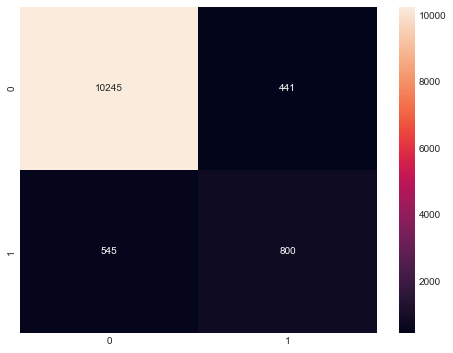

In [123]:
#CatBoost

import catboost as ctb
ctb = ctb.CatBoostClassifier(random_state=23)

ctb.fit(X_smote,Y_smote,verbose=False)
y_train_preds = ctb.predict(X_smote)
y_test_preds = ctb.predict(X_test_scaled)


print('The accuracy of the CatBoost (train) is',metrics.accuracy_score(y_train_preds,Y_smote))
print('The accuracy of the CatBoost (test) is',metrics.accuracy_score(Y_test,y_test_preds))
print(classification_report(Y_test,y_test_preds))

cmctb=confusion_matrix(Y_test,y_test_preds)
sns.heatmap(cmctb,annot=True,fmt='g')

The accuracy of the RandomForest (train) is 0.8838841649286058
The accuracy of the RandomForest (test) is 0.8427395893940653
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     10686
           1       0.40      0.82      0.54      1345

    accuracy                           0.84     12031
   macro avg       0.69      0.83      0.72     12031
weighted avg       0.91      0.84      0.86     12031



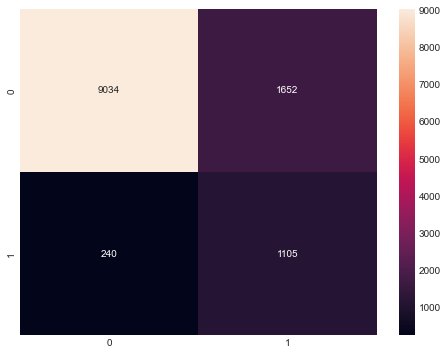

In [124]:
#RandomForest

rf = RandomForestClassifier(max_depth = 5, random_state=42)
rf.fit(X_smote,Y_smote)
y_train_preds = rf.predict(X_smote)
y_test_preds = rf.predict(X_test_scaled)


print('The accuracy of the RandomForest (train) is',metrics.accuracy_score(y_train_preds,Y_smote))
print('The accuracy of the RandomForest (test) is',metrics.accuracy_score(Y_test,y_test_preds))
print(classification_report(Y_test,y_test_preds))

cmrf=confusion_matrix(Y_test,y_test_preds)
sns.heatmap(cmrf,annot=True,fmt='g')

The accuracy of the KNN (train) is 0.9464543558479063
The accuracy of the KNN (test) is 0.846479926855623
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     10686
           1       0.40      0.72      0.51      1345

    accuracy                           0.85     12031
   macro avg       0.68      0.79      0.71     12031
weighted avg       0.90      0.85      0.86     12031



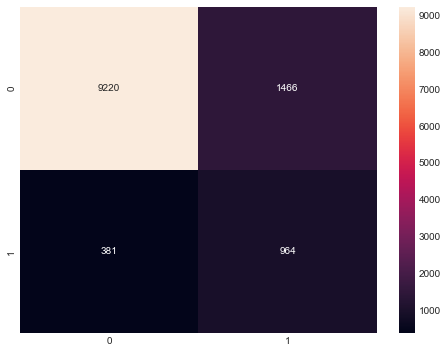

In [125]:
knn = KNeighborsClassifier()
knn.fit(X_smote,Y_smote)
y_train_preds = knn.predict(X_smote)
y_test_preds = knn.predict(X_test_scaled)

print('The accuracy of the KNN (train) is',metrics.accuracy_score(y_train_preds,Y_smote))
print('The accuracy of the KNN (test) is',metrics.accuracy_score(Y_test,y_test_preds))
print(classification_report(Y_test,y_test_preds))

cmknn=confusion_matrix(Y_test,y_test_preds)
sns.heatmap(cmknn,annot=True,fmt='g')

# Model Tuning

In [127]:
#Loading the tuned model
fit_model=catalog.load("fit_model")
fit_model1=catalog.load("fit_model1")
final_model=catalog.load("final_model")

[10/09/22 18:38:43] INFO     Loading data from 'fit_model' (PickleDataSet)...                   ]8;id=117922;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=508769;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'fit_model1' (PickleDataSet)...                  ]8;id=615824;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=308383;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

                    INFO     Loading data from 'final_model' (PickleDataSet)...                 ]8;id=396529;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=202712;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

0:	learn: 0.6779704	total: 23.9ms	remaining: 11.9s
1:	learn: 0.6649459	total: 44.9ms	remaining: 11.2s
2:	learn: 0.6527947	total: 66.7ms	remaining: 11.1s
3:	learn: 0.6402111	total: 87.9ms	remaining: 10.9s
4:	learn: 0.6270555	total: 108ms	remaining: 10.7s
5:	learn: 0.6171090	total: 128ms	remaining: 10.6s
6:	learn: 0.6054944	total: 148ms	remaining: 10.4s
7:	learn: 0.5943465	total: 168ms	remaining: 10.3s
8:	learn: 0.5817019	total: 188ms	remaining: 10.2s
9:	learn: 0.5719376	total: 208ms	remaining: 10.2s
10:	learn: 0.5619181	total: 231ms	remaining: 10.3s
11:	learn: 0.5518537	total: 253ms	remaining: 10.3s
12:	learn: 0.5429256	total: 274ms	remaining: 10.3s
13:	learn: 0.5343153	total: 294ms	remaining: 10.2s
14:	learn: 0.5254077	total: 315ms	remaining: 10.2s
15:	learn: 0.5177363	total: 335ms	remaining: 10.1s
16:	learn: 0.5093174	total: 356ms	remaining: 10.1s
17:	learn: 0.5013543	total: 376ms	remaining: 10.1s
18:	learn: 0.4941337	total: 398ms	remaining: 10.1s
19:	learn: 0.4875499	total: 418ms	rem

165:	learn: 0.1501528	total: 3.59s	remaining: 7.22s
166:	learn: 0.1494482	total: 3.61s	remaining: 7.21s
167:	learn: 0.1484136	total: 3.63s	remaining: 7.18s
168:	learn: 0.1476843	total: 3.66s	remaining: 7.16s
169:	learn: 0.1469025	total: 3.68s	remaining: 7.14s
170:	learn: 0.1465661	total: 3.7s	remaining: 7.12s
171:	learn: 0.1459830	total: 3.72s	remaining: 7.1s
172:	learn: 0.1456013	total: 3.74s	remaining: 7.08s
173:	learn: 0.1450620	total: 3.77s	remaining: 7.06s
174:	learn: 0.1438573	total: 3.79s	remaining: 7.04s
175:	learn: 0.1430616	total: 3.81s	remaining: 7.02s
176:	learn: 0.1422273	total: 3.84s	remaining: 7s
177:	learn: 0.1418259	total: 3.86s	remaining: 6.98s
178:	learn: 0.1409809	total: 3.88s	remaining: 6.96s
179:	learn: 0.1403603	total: 3.9s	remaining: 6.94s
180:	learn: 0.1399252	total: 3.92s	remaining: 6.92s
181:	learn: 0.1390785	total: 3.95s	remaining: 6.9s
182:	learn: 0.1386293	total: 3.97s	remaining: 6.87s
183:	learn: 0.1381334	total: 3.99s	remaining: 6.85s
184:	learn: 0.13752

328:	learn: 0.0917626	total: 7.27s	remaining: 3.78s
329:	learn: 0.0915143	total: 7.29s	remaining: 3.76s
330:	learn: 0.0913856	total: 7.32s	remaining: 3.73s
331:	learn: 0.0911463	total: 7.34s	remaining: 3.71s
332:	learn: 0.0907884	total: 7.36s	remaining: 3.69s
333:	learn: 0.0906869	total: 7.38s	remaining: 3.67s
334:	learn: 0.0904470	total: 7.4s	remaining: 3.65s
335:	learn: 0.0901186	total: 7.43s	remaining: 3.62s
336:	learn: 0.0899920	total: 7.45s	remaining: 3.6s
337:	learn: 0.0897793	total: 7.47s	remaining: 3.58s
338:	learn: 0.0896689	total: 7.49s	remaining: 3.56s
339:	learn: 0.0894705	total: 7.52s	remaining: 3.54s
340:	learn: 0.0892777	total: 7.54s	remaining: 3.52s
341:	learn: 0.0890923	total: 7.56s	remaining: 3.49s
342:	learn: 0.0888492	total: 7.58s	remaining: 3.47s
343:	learn: 0.0887053	total: 7.6s	remaining: 3.45s
344:	learn: 0.0885822	total: 7.63s	remaining: 3.43s
345:	learn: 0.0885015	total: 7.65s	remaining: 3.4s
346:	learn: 0.0883285	total: 7.67s	remaining: 3.38s
347:	learn: 0.08

489:	learn: 0.0707632	total: 10.9s	remaining: 223ms
490:	learn: 0.0707144	total: 10.9s	remaining: 200ms
491:	learn: 0.0706329	total: 10.9s	remaining: 178ms
492:	learn: 0.0704832	total: 11s	remaining: 156ms
493:	learn: 0.0704404	total: 11s	remaining: 133ms
494:	learn: 0.0703539	total: 11s	remaining: 111ms
495:	learn: 0.0702893	total: 11s	remaining: 88.9ms
496:	learn: 0.0702478	total: 11.1s	remaining: 66.7ms
497:	learn: 0.0701355	total: 11.1s	remaining: 44.5ms
498:	learn: 0.0700227	total: 11.1s	remaining: 22.2ms
499:	learn: 0.0699098	total: 11.1s	remaining: 0us
0:	learn: 0.6786774	total: 23.9ms	remaining: 11.9s
1:	learn: 0.6660989	total: 44.8ms	remaining: 11.1s
2:	learn: 0.6536406	total: 65.3ms	remaining: 10.8s
3:	learn: 0.6418844	total: 85.6ms	remaining: 10.6s
4:	learn: 0.6299655	total: 108ms	remaining: 10.7s
5:	learn: 0.6214527	total: 128ms	remaining: 10.5s
6:	learn: 0.6114725	total: 147ms	remaining: 10.4s
7:	learn: 0.6016223	total: 167ms	remaining: 10.3s
8:	learn: 0.5907850	total: 187

151:	learn: 0.2179146	total: 3.23s	remaining: 7.4s
152:	learn: 0.2172681	total: 3.26s	remaining: 7.39s
153:	learn: 0.2161016	total: 3.28s	remaining: 7.37s
154:	learn: 0.2150710	total: 3.3s	remaining: 7.35s
155:	learn: 0.2146616	total: 3.32s	remaining: 7.32s
156:	learn: 0.2137078	total: 3.34s	remaining: 7.3s
157:	learn: 0.2130363	total: 3.36s	remaining: 7.27s
158:	learn: 0.2122467	total: 3.38s	remaining: 7.25s
159:	learn: 0.2109407	total: 3.4s	remaining: 7.23s
160:	learn: 0.2101919	total: 3.42s	remaining: 7.2s
161:	learn: 0.2092117	total: 3.44s	remaining: 7.18s
162:	learn: 0.2087817	total: 3.46s	remaining: 7.16s
163:	learn: 0.2083555	total: 3.48s	remaining: 7.13s
164:	learn: 0.2079625	total: 3.5s	remaining: 7.11s
165:	learn: 0.2072488	total: 3.52s	remaining: 7.08s
166:	learn: 0.2069663	total: 3.54s	remaining: 7.06s
167:	learn: 0.2061071	total: 3.56s	remaining: 7.04s
168:	learn: 0.2056741	total: 3.58s	remaining: 7.01s
169:	learn: 0.2053226	total: 3.6s	remaining: 6.99s
170:	learn: 0.20508

312:	learn: 0.1605130	total: 6.55s	remaining: 3.91s
313:	learn: 0.1603160	total: 6.57s	remaining: 3.89s
314:	learn: 0.1602062	total: 6.59s	remaining: 3.87s
315:	learn: 0.1600130	total: 6.61s	remaining: 3.85s
316:	learn: 0.1597933	total: 6.63s	remaining: 3.83s
317:	learn: 0.1596515	total: 6.66s	remaining: 3.81s
318:	learn: 0.1595255	total: 6.67s	remaining: 3.79s
319:	learn: 0.1593538	total: 6.7s	remaining: 3.77s
320:	learn: 0.1591837	total: 6.71s	remaining: 3.74s
321:	learn: 0.1589237	total: 6.73s	remaining: 3.72s
322:	learn: 0.1588039	total: 6.75s	remaining: 3.7s
323:	learn: 0.1586090	total: 6.78s	remaining: 3.68s
324:	learn: 0.1585246	total: 6.8s	remaining: 3.66s
325:	learn: 0.1584379	total: 6.82s	remaining: 3.64s
326:	learn: 0.1581594	total: 6.83s	remaining: 3.62s
327:	learn: 0.1579882	total: 6.86s	remaining: 3.59s
328:	learn: 0.1579257	total: 6.88s	remaining: 3.57s
329:	learn: 0.1578394	total: 6.89s	remaining: 3.55s
330:	learn: 0.1576742	total: 6.92s	remaining: 3.53s
331:	learn: 0.1

475:	learn: 0.1428020	total: 9.95s	remaining: 501ms
476:	learn: 0.1426876	total: 9.97s	remaining: 481ms
477:	learn: 0.1425513	total: 9.99s	remaining: 460ms
478:	learn: 0.1425024	total: 10s	remaining: 439ms
479:	learn: 0.1424663	total: 10s	remaining: 418ms
480:	learn: 0.1424087	total: 10.1s	remaining: 397ms
481:	learn: 0.1423514	total: 10.1s	remaining: 376ms
482:	learn: 0.1422755	total: 10.1s	remaining: 355ms
483:	learn: 0.1422291	total: 10.1s	remaining: 334ms
484:	learn: 0.1421000	total: 10.1s	remaining: 313ms
485:	learn: 0.1420454	total: 10.2s	remaining: 293ms
486:	learn: 0.1419650	total: 10.2s	remaining: 272ms
487:	learn: 0.1418947	total: 10.2s	remaining: 251ms
488:	learn: 0.1417911	total: 10.2s	remaining: 230ms
489:	learn: 0.1417445	total: 10.2s	remaining: 209ms
490:	learn: 0.1417023	total: 10.3s	remaining: 188ms
491:	learn: 0.1416390	total: 10.3s	remaining: 167ms
492:	learn: 0.1415275	total: 10.3s	remaining: 146ms
493:	learn: 0.1414885	total: 10.3s	remaining: 125ms
494:	learn: 0.14

140:	learn: 0.2223835	total: 2.94s	remaining: 7.48s
141:	learn: 0.2218026	total: 2.96s	remaining: 7.46s
142:	learn: 0.2207257	total: 2.98s	remaining: 7.44s
143:	learn: 0.2196291	total: 3s	remaining: 7.42s
144:	learn: 0.2190195	total: 3.02s	remaining: 7.4s
145:	learn: 0.2186289	total: 3.04s	remaining: 7.38s
146:	learn: 0.2179480	total: 3.06s	remaining: 7.35s
147:	learn: 0.2175175	total: 3.08s	remaining: 7.33s
148:	learn: 0.2159437	total: 3.1s	remaining: 7.31s
149:	learn: 0.2154228	total: 3.12s	remaining: 7.28s
150:	learn: 0.2149155	total: 3.14s	remaining: 7.27s
151:	learn: 0.2143626	total: 3.16s	remaining: 7.24s
152:	learn: 0.2134293	total: 3.19s	remaining: 7.23s
153:	learn: 0.2127776	total: 3.21s	remaining: 7.2s
154:	learn: 0.2120321	total: 3.23s	remaining: 7.18s
155:	learn: 0.2113169	total: 3.25s	remaining: 7.16s
156:	learn: 0.2105243	total: 3.27s	remaining: 7.13s
157:	learn: 0.2102869	total: 3.28s	remaining: 7.11s
158:	learn: 0.2095580	total: 3.31s	remaining: 7.09s
159:	learn: 0.2088

305:	learn: 0.1600416	total: 6.33s	remaining: 4.01s
306:	learn: 0.1599619	total: 6.35s	remaining: 3.99s
307:	learn: 0.1598433	total: 6.37s	remaining: 3.97s
308:	learn: 0.1595950	total: 6.4s	remaining: 3.95s
309:	learn: 0.1594781	total: 6.42s	remaining: 3.93s
310:	learn: 0.1593071	total: 6.44s	remaining: 3.91s
311:	learn: 0.1590322	total: 6.46s	remaining: 3.89s
312:	learn: 0.1589146	total: 6.48s	remaining: 3.87s
313:	learn: 0.1585932	total: 6.5s	remaining: 3.85s
314:	learn: 0.1584288	total: 6.52s	remaining: 3.83s
315:	learn: 0.1582265	total: 6.54s	remaining: 3.81s
316:	learn: 0.1581340	total: 6.56s	remaining: 3.79s
317:	learn: 0.1580612	total: 6.58s	remaining: 3.77s
318:	learn: 0.1578720	total: 6.6s	remaining: 3.74s
319:	learn: 0.1577724	total: 6.62s	remaining: 3.72s
320:	learn: 0.1576786	total: 6.64s	remaining: 3.7s
321:	learn: 0.1575116	total: 6.66s	remaining: 3.68s
322:	learn: 0.1573329	total: 6.68s	remaining: 3.66s
323:	learn: 0.1571859	total: 6.7s	remaining: 3.64s
324:	learn: 0.157

471:	learn: 0.1417773	total: 9.76s	remaining: 579ms
472:	learn: 0.1417206	total: 9.78s	remaining: 558ms
473:	learn: 0.1416435	total: 9.8s	remaining: 538ms
474:	learn: 0.1415147	total: 9.82s	remaining: 517ms
475:	learn: 0.1414499	total: 9.84s	remaining: 496ms
476:	learn: 0.1414042	total: 9.86s	remaining: 475ms
477:	learn: 0.1413473	total: 9.88s	remaining: 455ms
478:	learn: 0.1412585	total: 9.9s	remaining: 434ms
479:	learn: 0.1412142	total: 9.92s	remaining: 413ms
480:	learn: 0.1411656	total: 9.94s	remaining: 393ms
481:	learn: 0.1411083	total: 9.96s	remaining: 372ms
482:	learn: 0.1410383	total: 9.98s	remaining: 351ms
483:	learn: 0.1409506	total: 10s	remaining: 331ms
484:	learn: 0.1408147	total: 10s	remaining: 310ms
485:	learn: 0.1407449	total: 10s	remaining: 289ms
486:	learn: 0.1406595	total: 10.1s	remaining: 269ms
487:	learn: 0.1406093	total: 10.1s	remaining: 248ms
488:	learn: 0.1405566	total: 10.1s	remaining: 227ms
489:	learn: 0.1404840	total: 10.1s	remaining: 206ms
490:	learn: 0.140442

134:	learn: 0.2267930	total: 2.78s	remaining: 7.52s
135:	learn: 0.2261150	total: 2.8s	remaining: 7.5s
136:	learn: 0.2248411	total: 2.83s	remaining: 7.49s
137:	learn: 0.2241527	total: 2.85s	remaining: 7.47s
138:	learn: 0.2236279	total: 2.87s	remaining: 7.45s
139:	learn: 0.2226737	total: 2.89s	remaining: 7.44s
140:	learn: 0.2223281	total: 2.91s	remaining: 7.42s
141:	learn: 0.2212008	total: 2.94s	remaining: 7.4s
142:	learn: 0.2200731	total: 2.96s	remaining: 7.38s
143:	learn: 0.2195258	total: 2.99s	remaining: 7.39s
144:	learn: 0.2191877	total: 3.01s	remaining: 7.36s
145:	learn: 0.2180937	total: 3.03s	remaining: 7.34s
146:	learn: 0.2175008	total: 3.05s	remaining: 7.32s
147:	learn: 0.2171913	total: 3.07s	remaining: 7.3s
148:	learn: 0.2166603	total: 3.09s	remaining: 7.28s
149:	learn: 0.2163731	total: 3.11s	remaining: 7.26s
150:	learn: 0.2160309	total: 3.14s	remaining: 7.25s
151:	learn: 0.2155009	total: 3.16s	remaining: 7.23s
152:	learn: 0.2148059	total: 3.18s	remaining: 7.21s
153:	learn: 0.21

295:	learn: 0.1626849	total: 6.18s	remaining: 4.26s
296:	learn: 0.1624675	total: 6.2s	remaining: 4.24s
297:	learn: 0.1623895	total: 6.22s	remaining: 4.22s
298:	learn: 0.1622425	total: 6.24s	remaining: 4.2s
299:	learn: 0.1621466	total: 6.26s	remaining: 4.17s
300:	learn: 0.1620597	total: 6.28s	remaining: 4.15s
301:	learn: 0.1619631	total: 6.3s	remaining: 4.13s
302:	learn: 0.1617368	total: 6.32s	remaining: 4.11s
303:	learn: 0.1616666	total: 6.34s	remaining: 4.09s
304:	learn: 0.1615984	total: 6.36s	remaining: 4.07s
305:	learn: 0.1614944	total: 6.38s	remaining: 4.04s
306:	learn: 0.1612966	total: 6.4s	remaining: 4.02s
307:	learn: 0.1606477	total: 6.42s	remaining: 4s
308:	learn: 0.1604599	total: 6.44s	remaining: 3.98s
309:	learn: 0.1603670	total: 6.46s	remaining: 3.96s
310:	learn: 0.1600718	total: 6.48s	remaining: 3.94s
311:	learn: 0.1598995	total: 6.5s	remaining: 3.92s
312:	learn: 0.1597949	total: 6.52s	remaining: 3.9s
313:	learn: 0.1594561	total: 6.54s	remaining: 3.88s
314:	learn: 0.1593526

456:	learn: 0.1437217	total: 9.5s	remaining: 894ms
457:	learn: 0.1436660	total: 9.52s	remaining: 873ms
458:	learn: 0.1435663	total: 9.54s	remaining: 853ms
459:	learn: 0.1434629	total: 9.56s	remaining: 832ms
460:	learn: 0.1433942	total: 9.58s	remaining: 811ms
461:	learn: 0.1432810	total: 9.6s	remaining: 790ms
462:	learn: 0.1432002	total: 9.62s	remaining: 769ms
463:	learn: 0.1431226	total: 9.64s	remaining: 748ms
464:	learn: 0.1430409	total: 9.66s	remaining: 727ms
465:	learn: 0.1429884	total: 9.68s	remaining: 706ms
466:	learn: 0.1428880	total: 9.7s	remaining: 686ms
467:	learn: 0.1428277	total: 9.72s	remaining: 665ms
468:	learn: 0.1427644	total: 9.74s	remaining: 644ms
469:	learn: 0.1427024	total: 9.76s	remaining: 623ms
470:	learn: 0.1425957	total: 9.78s	remaining: 602ms
471:	learn: 0.1425127	total: 9.8s	remaining: 582ms
472:	learn: 0.1424525	total: 9.82s	remaining: 561ms
473:	learn: 0.1424010	total: 9.84s	remaining: 540ms
474:	learn: 0.1423503	total: 9.86s	remaining: 519ms
475:	learn: 0.14

123:	learn: 0.2350506	total: 2.58s	remaining: 7.83s
124:	learn: 0.2339300	total: 2.6s	remaining: 7.81s
125:	learn: 0.2327713	total: 2.62s	remaining: 7.79s
126:	learn: 0.2320707	total: 2.65s	remaining: 7.77s
127:	learn: 0.2311485	total: 2.67s	remaining: 7.75s
128:	learn: 0.2304620	total: 2.69s	remaining: 7.73s
129:	learn: 0.2290488	total: 2.71s	remaining: 7.7s
130:	learn: 0.2285863	total: 2.73s	remaining: 7.68s
131:	learn: 0.2272560	total: 2.75s	remaining: 7.66s
132:	learn: 0.2259357	total: 2.77s	remaining: 7.63s
133:	learn: 0.2255345	total: 2.79s	remaining: 7.62s
134:	learn: 0.2251934	total: 2.81s	remaining: 7.59s
135:	learn: 0.2247702	total: 2.83s	remaining: 7.57s
136:	learn: 0.2243789	total: 2.85s	remaining: 7.54s
137:	learn: 0.2236582	total: 2.87s	remaining: 7.52s
138:	learn: 0.2232289	total: 2.89s	remaining: 7.5s
139:	learn: 0.2224561	total: 2.91s	remaining: 7.48s
140:	learn: 0.2220241	total: 2.93s	remaining: 7.45s
141:	learn: 0.2212352	total: 2.95s	remaining: 7.43s
142:	learn: 0.2

289:	learn: 0.1620806	total: 5.96s	remaining: 4.32s
290:	learn: 0.1618286	total: 5.99s	remaining: 4.3s
291:	learn: 0.1616347	total: 6.01s	remaining: 4.28s
292:	learn: 0.1615196	total: 6.03s	remaining: 4.26s
293:	learn: 0.1613458	total: 6.05s	remaining: 4.24s
294:	learn: 0.1611405	total: 6.07s	remaining: 4.22s
295:	learn: 0.1609350	total: 6.09s	remaining: 4.2s
296:	learn: 0.1607305	total: 6.11s	remaining: 4.17s
297:	learn: 0.1606410	total: 6.13s	remaining: 4.15s
298:	learn: 0.1604452	total: 6.14s	remaining: 4.13s
299:	learn: 0.1603195	total: 6.17s	remaining: 4.11s
300:	learn: 0.1601816	total: 6.19s	remaining: 4.09s
301:	learn: 0.1599655	total: 6.21s	remaining: 4.07s
302:	learn: 0.1598372	total: 6.22s	remaining: 4.05s
303:	learn: 0.1596389	total: 6.24s	remaining: 4.03s
304:	learn: 0.1595542	total: 6.26s	remaining: 4s
305:	learn: 0.1594439	total: 6.28s	remaining: 3.98s
306:	learn: 0.1592506	total: 6.3s	remaining: 3.96s
307:	learn: 0.1590195	total: 6.32s	remaining: 3.94s
308:	learn: 0.1588

455:	learn: 0.1422942	total: 9.3s	remaining: 897ms
456:	learn: 0.1422402	total: 9.32s	remaining: 877ms
457:	learn: 0.1421784	total: 9.34s	remaining: 856ms
458:	learn: 0.1421121	total: 9.36s	remaining: 836ms
459:	learn: 0.1420613	total: 9.38s	remaining: 816ms
460:	learn: 0.1420148	total: 9.4s	remaining: 795ms
461:	learn: 0.1418566	total: 9.42s	remaining: 775ms
462:	learn: 0.1418025	total: 9.44s	remaining: 754ms
463:	learn: 0.1416814	total: 9.46s	remaining: 734ms
464:	learn: 0.1416113	total: 9.47s	remaining: 713ms
465:	learn: 0.1415394	total: 9.49s	remaining: 693ms
466:	learn: 0.1413459	total: 9.52s	remaining: 673ms
467:	learn: 0.1412441	total: 9.54s	remaining: 652ms
468:	learn: 0.1411458	total: 9.56s	remaining: 632ms
469:	learn: 0.1410918	total: 9.57s	remaining: 611ms
470:	learn: 0.1410481	total: 9.59s	remaining: 591ms
471:	learn: 0.1409781	total: 9.61s	remaining: 570ms
472:	learn: 0.1409217	total: 9.63s	remaining: 550ms
473:	learn: 0.1408613	total: 9.65s	remaining: 529ms
474:	learn: 0.

117:	learn: 0.1969990	total: 2.73s	remaining: 8.84s
118:	learn: 0.1958036	total: 2.75s	remaining: 8.82s
119:	learn: 0.1936578	total: 2.78s	remaining: 8.79s
120:	learn: 0.1920206	total: 2.8s	remaining: 8.77s
121:	learn: 0.1902231	total: 2.82s	remaining: 8.74s
122:	learn: 0.1897616	total: 2.84s	remaining: 8.72s
123:	learn: 0.1886926	total: 2.87s	remaining: 8.69s
124:	learn: 0.1867456	total: 2.89s	remaining: 8.66s
125:	learn: 0.1857441	total: 2.91s	remaining: 8.63s
126:	learn: 0.1843642	total: 2.93s	remaining: 8.61s
127:	learn: 0.1825568	total: 2.95s	remaining: 8.59s
128:	learn: 0.1818420	total: 2.98s	remaining: 8.56s
129:	learn: 0.1805878	total: 3s	remaining: 8.53s
130:	learn: 0.1787288	total: 3.02s	remaining: 8.51s
131:	learn: 0.1770263	total: 3.04s	remaining: 8.48s
132:	learn: 0.1765629	total: 3.06s	remaining: 8.45s
133:	learn: 0.1756511	total: 3.08s	remaining: 8.43s
134:	learn: 0.1750470	total: 3.11s	remaining: 8.4s
135:	learn: 0.1741174	total: 3.13s	remaining: 8.38s
136:	learn: 0.173

278:	learn: 0.1017989	total: 6.33s	remaining: 5.01s
279:	learn: 0.1016157	total: 6.35s	remaining: 4.99s
280:	learn: 0.1014263	total: 6.37s	remaining: 4.97s
281:	learn: 0.1009869	total: 6.4s	remaining: 4.95s
282:	learn: 0.1006313	total: 6.42s	remaining: 4.92s
283:	learn: 0.1004364	total: 6.44s	remaining: 4.9s
284:	learn: 0.1000929	total: 6.46s	remaining: 4.88s
285:	learn: 0.0999177	total: 6.49s	remaining: 4.85s
286:	learn: 0.0995309	total: 6.51s	remaining: 4.83s
287:	learn: 0.0992759	total: 6.53s	remaining: 4.81s
288:	learn: 0.0991139	total: 6.56s	remaining: 4.79s
289:	learn: 0.0988087	total: 6.58s	remaining: 4.76s
290:	learn: 0.0985471	total: 6.6s	remaining: 4.74s
291:	learn: 0.0983445	total: 6.62s	remaining: 4.72s
292:	learn: 0.0980731	total: 6.64s	remaining: 4.69s
293:	learn: 0.0978498	total: 6.67s	remaining: 4.67s
294:	learn: 0.0975621	total: 6.69s	remaining: 4.65s
295:	learn: 0.0974211	total: 6.71s	remaining: 4.62s
296:	learn: 0.0973004	total: 6.73s	remaining: 4.6s
297:	learn: 0.09

440:	learn: 0.0758699	total: 9.98s	remaining: 1.33s
441:	learn: 0.0757569	total: 10s	remaining: 1.31s
442:	learn: 0.0756409	total: 10s	remaining: 1.29s
443:	learn: 0.0754766	total: 10s	remaining: 1.27s
444:	learn: 0.0754360	total: 10.1s	remaining: 1.24s
445:	learn: 0.0753226	total: 10.1s	remaining: 1.22s
446:	learn: 0.0751911	total: 10.1s	remaining: 1.2s
447:	learn: 0.0751087	total: 10.1s	remaining: 1.18s
448:	learn: 0.0750272	total: 10.2s	remaining: 1.15s
449:	learn: 0.0748464	total: 10.2s	remaining: 1.13s
450:	learn: 0.0747907	total: 10.2s	remaining: 1.11s
451:	learn: 0.0746624	total: 10.2s	remaining: 1.09s
452:	learn: 0.0745213	total: 10.3s	remaining: 1.06s
453:	learn: 0.0744622	total: 10.3s	remaining: 1.04s
454:	learn: 0.0743718	total: 10.3s	remaining: 1.02s
455:	learn: 0.0743131	total: 10.3s	remaining: 996ms
456:	learn: 0.0742643	total: 10.3s	remaining: 973ms
457:	learn: 0.0741960	total: 10.4s	remaining: 950ms
458:	learn: 0.0739932	total: 10.4s	remaining: 928ms
459:	learn: 0.07381

107:	learn: 0.0495651	total: 1.67s	remaining: 6.05s
108:	learn: 0.0492306	total: 1.68s	remaining: 6.04s
109:	learn: 0.0489677	total: 1.7s	remaining: 6.02s
110:	learn: 0.0486853	total: 1.71s	remaining: 6.01s
111:	learn: 0.0484242	total: 1.73s	remaining: 5.99s
112:	learn: 0.0481686	total: 1.74s	remaining: 5.97s
113:	learn: 0.0478810	total: 1.76s	remaining: 5.96s
114:	learn: 0.0476247	total: 1.77s	remaining: 5.94s
115:	learn: 0.0473595	total: 1.79s	remaining: 5.92s
116:	learn: 0.0471324	total: 1.8s	remaining: 5.9s
117:	learn: 0.0468949	total: 1.82s	remaining: 5.89s
118:	learn: 0.0466682	total: 1.83s	remaining: 5.87s
119:	learn: 0.0464506	total: 1.85s	remaining: 5.85s
120:	learn: 0.0462602	total: 1.86s	remaining: 5.84s
121:	learn: 0.0460124	total: 1.88s	remaining: 5.83s
122:	learn: 0.0458072	total: 1.9s	remaining: 5.81s
123:	learn: 0.0456259	total: 1.91s	remaining: 5.79s
124:	learn: 0.0454441	total: 1.93s	remaining: 5.78s
125:	learn: 0.0453001	total: 1.94s	remaining: 5.76s
126:	learn: 0.04

268:	learn: 0.0371109	total: 4.15s	remaining: 3.56s
269:	learn: 0.0371012	total: 4.17s	remaining: 3.55s
270:	learn: 0.0370890	total: 4.18s	remaining: 3.53s
271:	learn: 0.0370722	total: 4.2s	remaining: 3.52s
272:	learn: 0.0370633	total: 4.21s	remaining: 3.5s
273:	learn: 0.0370466	total: 4.23s	remaining: 3.49s
274:	learn: 0.0370296	total: 4.25s	remaining: 3.47s
275:	learn: 0.0370096	total: 4.26s	remaining: 3.46s
276:	learn: 0.0369896	total: 4.28s	remaining: 3.44s
277:	learn: 0.0369784	total: 4.29s	remaining: 3.43s
278:	learn: 0.0369689	total: 4.31s	remaining: 3.41s
279:	learn: 0.0369555	total: 4.32s	remaining: 3.4s
280:	learn: 0.0369401	total: 4.34s	remaining: 3.38s
281:	learn: 0.0369274	total: 4.36s	remaining: 3.37s
282:	learn: 0.0369116	total: 4.37s	remaining: 3.35s
283:	learn: 0.0368908	total: 4.39s	remaining: 3.34s
284:	learn: 0.0368813	total: 4.4s	remaining: 3.32s
285:	learn: 0.0368586	total: 4.42s	remaining: 3.31s
286:	learn: 0.0368482	total: 4.43s	remaining: 3.29s
287:	learn: 0.03

438:	learn: 0.0354262	total: 6.85s	remaining: 951ms
439:	learn: 0.0354212	total: 6.86s	remaining: 936ms
440:	learn: 0.0354149	total: 6.88s	remaining: 920ms
441:	learn: 0.0354075	total: 6.89s	remaining: 905ms
442:	learn: 0.0354016	total: 6.91s	remaining: 889ms
443:	learn: 0.0353970	total: 6.92s	remaining: 873ms
444:	learn: 0.0353931	total: 6.94s	remaining: 858ms
445:	learn: 0.0353877	total: 6.96s	remaining: 842ms
446:	learn: 0.0353798	total: 6.97s	remaining: 827ms
447:	learn: 0.0353721	total: 6.99s	remaining: 811ms
448:	learn: 0.0353653	total: 7s	remaining: 796ms
449:	learn: 0.0353626	total: 7.02s	remaining: 780ms
450:	learn: 0.0353554	total: 7.03s	remaining: 764ms
451:	learn: 0.0353498	total: 7.05s	remaining: 749ms
452:	learn: 0.0353384	total: 7.07s	remaining: 733ms
453:	learn: 0.0353318	total: 7.08s	remaining: 718ms
454:	learn: 0.0353254	total: 7.1s	remaining: 702ms
455:	learn: 0.0353174	total: 7.11s	remaining: 686ms
456:	learn: 0.0353135	total: 7.13s	remaining: 671ms
457:	learn: 0.03

104:	learn: 0.2602317	total: 2.38s	remaining: 8.97s
105:	learn: 0.2580547	total: 2.41s	remaining: 8.95s
106:	learn: 0.2571283	total: 2.43s	remaining: 8.93s
107:	learn: 0.2565693	total: 2.45s	remaining: 8.91s
108:	learn: 0.2558720	total: 2.48s	remaining: 8.89s
109:	learn: 0.2549166	total: 2.5s	remaining: 8.86s
110:	learn: 0.2534667	total: 2.52s	remaining: 8.84s
111:	learn: 0.2525546	total: 2.54s	remaining: 8.81s
112:	learn: 0.2519355	total: 2.56s	remaining: 8.78s
113:	learn: 0.2513634	total: 2.59s	remaining: 8.76s
114:	learn: 0.2499005	total: 2.61s	remaining: 8.74s
115:	learn: 0.2483588	total: 2.63s	remaining: 8.72s
116:	learn: 0.2470516	total: 2.65s	remaining: 8.69s
117:	learn: 0.2448425	total: 2.68s	remaining: 8.66s
118:	learn: 0.2435708	total: 2.7s	remaining: 8.64s
119:	learn: 0.2424932	total: 2.72s	remaining: 8.62s
120:	learn: 0.2420455	total: 2.74s	remaining: 8.59s
121:	learn: 0.2412768	total: 2.76s	remaining: 8.56s
122:	learn: 0.2408046	total: 2.79s	remaining: 8.54s
123:	learn: 0.

266:	learn: 0.1689222	total: 6.06s	remaining: 5.29s
267:	learn: 0.1685778	total: 6.09s	remaining: 5.27s
268:	learn: 0.1684007	total: 6.11s	remaining: 5.25s
269:	learn: 0.1681117	total: 6.14s	remaining: 5.23s
270:	learn: 0.1679004	total: 6.16s	remaining: 5.21s
271:	learn: 0.1676976	total: 6.19s	remaining: 5.18s
272:	learn: 0.1674135	total: 6.21s	remaining: 5.16s
273:	learn: 0.1672101	total: 6.23s	remaining: 5.14s
274:	learn: 0.1669357	total: 6.26s	remaining: 5.12s
275:	learn: 0.1668091	total: 6.28s	remaining: 5.1s
276:	learn: 0.1665454	total: 6.3s	remaining: 5.07s
277:	learn: 0.1663623	total: 6.33s	remaining: 5.05s
278:	learn: 0.1662269	total: 6.35s	remaining: 5.03s
279:	learn: 0.1659322	total: 6.37s	remaining: 5s
280:	learn: 0.1658480	total: 6.39s	remaining: 4.98s
281:	learn: 0.1656936	total: 6.41s	remaining: 4.96s
282:	learn: 0.1654217	total: 6.43s	remaining: 4.93s
283:	learn: 0.1652225	total: 6.46s	remaining: 4.91s
284:	learn: 0.1650495	total: 6.48s	remaining: 4.89s
285:	learn: 0.164

432:	learn: 0.1464347	total: 10s	remaining: 1.55s
433:	learn: 0.1463816	total: 10.1s	remaining: 1.53s
434:	learn: 0.1462610	total: 10.1s	remaining: 1.5s
435:	learn: 0.1461695	total: 10.1s	remaining: 1.48s
436:	learn: 0.1461243	total: 10.1s	remaining: 1.46s
437:	learn: 0.1460523	total: 10.1s	remaining: 1.44s
438:	learn: 0.1459488	total: 10.2s	remaining: 1.41s
439:	learn: 0.1458516	total: 10.2s	remaining: 1.39s
440:	learn: 0.1458005	total: 10.2s	remaining: 1.37s
441:	learn: 0.1457485	total: 10.3s	remaining: 1.34s
442:	learn: 0.1456607	total: 10.3s	remaining: 1.32s
443:	learn: 0.1455479	total: 10.3s	remaining: 1.3s
444:	learn: 0.1454836	total: 10.3s	remaining: 1.28s
445:	learn: 0.1454178	total: 10.3s	remaining: 1.25s
446:	learn: 0.1453593	total: 10.4s	remaining: 1.23s
447:	learn: 0.1452397	total: 10.4s	remaining: 1.21s
448:	learn: 0.1451904	total: 10.4s	remaining: 1.18s
449:	learn: 0.1450626	total: 10.4s	remaining: 1.16s
450:	learn: 0.1449636	total: 10.5s	remaining: 1.14s
451:	learn: 0.14

93:	learn: 0.1440282	total: 1.46s	remaining: 6.32s
94:	learn: 0.1435441	total: 1.48s	remaining: 6.3s
95:	learn: 0.1429268	total: 1.5s	remaining: 6.29s
96:	learn: 0.1425075	total: 1.51s	remaining: 6.27s
97:	learn: 0.1420824	total: 1.52s	remaining: 6.25s
98:	learn: 0.1415383	total: 1.54s	remaining: 6.24s
99:	learn: 0.1411452	total: 1.55s	remaining: 6.22s
100:	learn: 0.1408066	total: 1.57s	remaining: 6.2s
101:	learn: 0.1402803	total: 1.58s	remaining: 6.18s
102:	learn: 0.1398885	total: 1.6s	remaining: 6.17s
103:	learn: 0.1394825	total: 1.61s	remaining: 6.15s
104:	learn: 0.1389428	total: 1.63s	remaining: 6.13s
105:	learn: 0.1385723	total: 1.65s	remaining: 6.11s
106:	learn: 0.1382524	total: 1.66s	remaining: 6.1s
107:	learn: 0.1379173	total: 1.68s	remaining: 6.08s
108:	learn: 0.1375347	total: 1.69s	remaining: 6.07s
109:	learn: 0.1372683	total: 1.71s	remaining: 6.05s
110:	learn: 0.1369283	total: 1.72s	remaining: 6.03s
111:	learn: 0.1366786	total: 1.74s	remaining: 6.02s
112:	learn: 0.1364634	to

255:	learn: 0.1213780	total: 3.93s	remaining: 3.75s
256:	learn: 0.1213444	total: 3.95s	remaining: 3.73s
257:	learn: 0.1213112	total: 3.96s	remaining: 3.72s
258:	learn: 0.1212739	total: 3.98s	remaining: 3.7s
259:	learn: 0.1212491	total: 3.99s	remaining: 3.69s
260:	learn: 0.1212273	total: 4.01s	remaining: 3.67s
261:	learn: 0.1212028	total: 4.02s	remaining: 3.65s
262:	learn: 0.1211637	total: 4.04s	remaining: 3.64s
263:	learn: 0.1211410	total: 4.05s	remaining: 3.62s
264:	learn: 0.1211088	total: 4.07s	remaining: 3.61s
265:	learn: 0.1210770	total: 4.08s	remaining: 3.59s
266:	learn: 0.1210494	total: 4.1s	remaining: 3.58s
267:	learn: 0.1210385	total: 4.12s	remaining: 3.56s
268:	learn: 0.1210099	total: 4.13s	remaining: 3.55s
269:	learn: 0.1209880	total: 4.15s	remaining: 3.53s
270:	learn: 0.1209578	total: 4.16s	remaining: 3.52s
271:	learn: 0.1209379	total: 4.18s	remaining: 3.5s
272:	learn: 0.1209176	total: 4.19s	remaining: 3.49s
273:	learn: 0.1208731	total: 4.21s	remaining: 3.47s
274:	learn: 0.1

417:	learn: 0.1185525	total: 6.47s	remaining: 1.27s
418:	learn: 0.1185402	total: 6.49s	remaining: 1.25s
419:	learn: 0.1185264	total: 6.5s	remaining: 1.24s
420:	learn: 0.1185196	total: 6.52s	remaining: 1.22s
421:	learn: 0.1185099	total: 6.54s	remaining: 1.21s
422:	learn: 0.1185011	total: 6.55s	remaining: 1.19s
423:	learn: 0.1184930	total: 6.57s	remaining: 1.18s
424:	learn: 0.1184874	total: 6.58s	remaining: 1.16s
425:	learn: 0.1184787	total: 6.6s	remaining: 1.15s
426:	learn: 0.1184693	total: 6.61s	remaining: 1.13s
427:	learn: 0.1184616	total: 6.63s	remaining: 1.11s
428:	learn: 0.1184536	total: 6.64s	remaining: 1.1s
429:	learn: 0.1184470	total: 6.66s	remaining: 1.08s
430:	learn: 0.1184361	total: 6.68s	remaining: 1.07s
431:	learn: 0.1184287	total: 6.69s	remaining: 1.05s
432:	learn: 0.1184178	total: 6.71s	remaining: 1.04s
433:	learn: 0.1184097	total: 6.72s	remaining: 1.02s
434:	learn: 0.1183974	total: 6.74s	remaining: 1.01s
435:	learn: 0.1183918	total: 6.75s	remaining: 992ms
436:	learn: 0.1

77:	learn: 0.2986816	total: 1.77s	remaining: 9.58s
78:	learn: 0.2962701	total: 1.79s	remaining: 9.56s
79:	learn: 0.2951319	total: 1.82s	remaining: 9.54s
80:	learn: 0.2940816	total: 1.84s	remaining: 9.52s
81:	learn: 0.2928302	total: 1.86s	remaining: 9.49s
82:	learn: 0.2916262	total: 1.88s	remaining: 9.46s
83:	learn: 0.2906796	total: 1.91s	remaining: 9.43s
84:	learn: 0.2889273	total: 1.93s	remaining: 9.41s
85:	learn: 0.2875389	total: 1.95s	remaining: 9.38s
86:	learn: 0.2863267	total: 1.97s	remaining: 9.36s
87:	learn: 0.2845136	total: 2s	remaining: 9.35s
88:	learn: 0.2832370	total: 2.02s	remaining: 9.32s
89:	learn: 0.2805066	total: 2.04s	remaining: 9.29s
90:	learn: 0.2792398	total: 2.06s	remaining: 9.27s
91:	learn: 0.2772262	total: 2.08s	remaining: 9.25s
92:	learn: 0.2758751	total: 2.11s	remaining: 9.22s
93:	learn: 0.2733633	total: 2.13s	remaining: 9.2s
94:	learn: 0.2726674	total: 2.15s	remaining: 9.17s
95:	learn: 0.2699907	total: 2.18s	remaining: 9.17s
96:	learn: 0.2686216	total: 2.21s	r

236:	learn: 0.1742129	total: 5.38s	remaining: 5.97s
237:	learn: 0.1737731	total: 5.41s	remaining: 5.95s
238:	learn: 0.1736684	total: 5.43s	remaining: 5.93s
239:	learn: 0.1735279	total: 5.45s	remaining: 5.91s
240:	learn: 0.1731893	total: 5.47s	remaining: 5.88s
241:	learn: 0.1728582	total: 5.5s	remaining: 5.86s
242:	learn: 0.1726555	total: 5.52s	remaining: 5.84s
243:	learn: 0.1723228	total: 5.54s	remaining: 5.81s
244:	learn: 0.1721550	total: 5.56s	remaining: 5.79s
245:	learn: 0.1718458	total: 5.59s	remaining: 5.77s
246:	learn: 0.1715710	total: 5.61s	remaining: 5.75s
247:	learn: 0.1714505	total: 5.64s	remaining: 5.73s
248:	learn: 0.1710259	total: 5.66s	remaining: 5.71s
249:	learn: 0.1708937	total: 5.68s	remaining: 5.68s
250:	learn: 0.1707431	total: 5.71s	remaining: 5.66s
251:	learn: 0.1704541	total: 5.73s	remaining: 5.64s
252:	learn: 0.1702220	total: 5.75s	remaining: 5.61s
253:	learn: 0.1699860	total: 5.77s	remaining: 5.59s
254:	learn: 0.1697872	total: 5.79s	remaining: 5.57s
255:	learn: 0

403:	learn: 0.1479863	total: 9.19s	remaining: 2.18s
404:	learn: 0.1478430	total: 9.21s	remaining: 2.16s
405:	learn: 0.1476694	total: 9.23s	remaining: 2.14s
406:	learn: 0.1475330	total: 9.26s	remaining: 2.12s
407:	learn: 0.1474604	total: 9.28s	remaining: 2.09s
408:	learn: 0.1473466	total: 9.3s	remaining: 2.07s
409:	learn: 0.1472370	total: 9.32s	remaining: 2.05s
410:	learn: 0.1471084	total: 9.35s	remaining: 2.02s
411:	learn: 0.1470553	total: 9.37s	remaining: 2s
412:	learn: 0.1469688	total: 9.39s	remaining: 1.98s
413:	learn: 0.1468888	total: 9.42s	remaining: 1.96s
414:	learn: 0.1468052	total: 9.44s	remaining: 1.93s
415:	learn: 0.1467572	total: 9.46s	remaining: 1.91s
416:	learn: 0.1467101	total: 9.49s	remaining: 1.89s
417:	learn: 0.1466510	total: 9.51s	remaining: 1.86s
418:	learn: 0.1465578	total: 9.53s	remaining: 1.84s
419:	learn: 0.1464548	total: 9.56s	remaining: 1.82s
420:	learn: 0.1463881	total: 9.58s	remaining: 1.8s
421:	learn: 0.1462827	total: 9.61s	remaining: 1.77s
422:	learn: 0.146

65:	learn: 0.1688833	total: 1.06s	remaining: 7.01s
66:	learn: 0.1675508	total: 1.08s	remaining: 6.99s
67:	learn: 0.1660914	total: 1.1s	remaining: 6.98s
68:	learn: 0.1646992	total: 1.11s	remaining: 6.97s
69:	learn: 0.1632753	total: 1.13s	remaining: 6.95s
70:	learn: 0.1623024	total: 1.15s	remaining: 6.93s
71:	learn: 0.1611714	total: 1.16s	remaining: 6.91s
72:	learn: 0.1600904	total: 1.18s	remaining: 6.9s
73:	learn: 0.1588341	total: 1.19s	remaining: 6.88s
74:	learn: 0.1578902	total: 1.21s	remaining: 6.86s
75:	learn: 0.1566149	total: 1.23s	remaining: 6.84s
76:	learn: 0.1555708	total: 1.24s	remaining: 6.82s
77:	learn: 0.1544185	total: 1.26s	remaining: 6.8s
78:	learn: 0.1534110	total: 1.27s	remaining: 6.78s
79:	learn: 0.1527735	total: 1.29s	remaining: 6.77s
80:	learn: 0.1519521	total: 1.3s	remaining: 6.75s
81:	learn: 0.1511698	total: 1.32s	remaining: 6.73s
82:	learn: 0.1504202	total: 1.34s	remaining: 6.71s
83:	learn: 0.1497110	total: 1.35s	remaining: 6.7s
84:	learn: 0.1488181	total: 1.37s	re

224:	learn: 0.1209877	total: 3.56s	remaining: 4.36s
225:	learn: 0.1209531	total: 3.58s	remaining: 4.34s
226:	learn: 0.1209100	total: 3.6s	remaining: 4.33s
227:	learn: 0.1208718	total: 3.62s	remaining: 4.31s
228:	learn: 0.1208184	total: 3.63s	remaining: 4.3s
229:	learn: 0.1207897	total: 3.65s	remaining: 4.28s
230:	learn: 0.1207414	total: 3.67s	remaining: 4.27s
231:	learn: 0.1207204	total: 3.68s	remaining: 4.25s
232:	learn: 0.1206799	total: 3.7s	remaining: 4.24s
233:	learn: 0.1206498	total: 3.71s	remaining: 4.22s
234:	learn: 0.1206139	total: 3.73s	remaining: 4.21s
235:	learn: 0.1205893	total: 3.74s	remaining: 4.19s
236:	learn: 0.1205417	total: 3.76s	remaining: 4.17s
237:	learn: 0.1205107	total: 3.78s	remaining: 4.16s
238:	learn: 0.1204527	total: 3.79s	remaining: 4.14s
239:	learn: 0.1204209	total: 3.81s	remaining: 4.13s
240:	learn: 0.1203963	total: 3.83s	remaining: 4.11s
241:	learn: 0.1203741	total: 3.84s	remaining: 4.09s
242:	learn: 0.1203472	total: 3.86s	remaining: 4.08s
243:	learn: 0.1

389:	learn: 0.1174940	total: 6.24s	remaining: 1.76s
390:	learn: 0.1174790	total: 6.26s	remaining: 1.74s
391:	learn: 0.1174632	total: 6.28s	remaining: 1.73s
392:	learn: 0.1174548	total: 6.29s	remaining: 1.71s
393:	learn: 0.1174390	total: 6.31s	remaining: 1.7s
394:	learn: 0.1174311	total: 6.32s	remaining: 1.68s
395:	learn: 0.1174166	total: 6.34s	remaining: 1.66s
396:	learn: 0.1174051	total: 6.36s	remaining: 1.65s
397:	learn: 0.1173911	total: 6.37s	remaining: 1.63s
398:	learn: 0.1173784	total: 6.39s	remaining: 1.62s
399:	learn: 0.1173670	total: 6.4s	remaining: 1.6s
400:	learn: 0.1173582	total: 6.42s	remaining: 1.58s
401:	learn: 0.1173489	total: 6.43s	remaining: 1.57s
402:	learn: 0.1173352	total: 6.45s	remaining: 1.55s
403:	learn: 0.1173237	total: 6.47s	remaining: 1.54s
404:	learn: 0.1173137	total: 6.48s	remaining: 1.52s
405:	learn: 0.1173057	total: 6.5s	remaining: 1.5s
406:	learn: 0.1172964	total: 6.51s	remaining: 1.49s
407:	learn: 0.1172768	total: 6.53s	remaining: 1.47s
408:	learn: 0.117

50:	learn: 0.3564857	total: 1.14s	remaining: 10s
51:	learn: 0.3527441	total: 1.16s	remaining: 10s
52:	learn: 0.3494997	total: 1.19s	remaining: 10s
53:	learn: 0.3467645	total: 1.21s	remaining: 9.97s
54:	learn: 0.3440174	total: 1.23s	remaining: 9.95s
55:	learn: 0.3412706	total: 1.25s	remaining: 9.92s
56:	learn: 0.3371137	total: 1.27s	remaining: 9.89s
57:	learn: 0.3346626	total: 1.29s	remaining: 9.86s
58:	learn: 0.3323814	total: 1.31s	remaining: 9.83s
59:	learn: 0.3302336	total: 1.34s	remaining: 9.8s
60:	learn: 0.3277381	total: 1.36s	remaining: 9.8s
61:	learn: 0.3258884	total: 1.38s	remaining: 9.78s
62:	learn: 0.3238169	total: 1.41s	remaining: 9.75s
63:	learn: 0.3218193	total: 1.43s	remaining: 9.72s
64:	learn: 0.3192976	total: 1.45s	remaining: 9.69s
65:	learn: 0.3175742	total: 1.47s	remaining: 9.66s
66:	learn: 0.3156915	total: 1.49s	remaining: 9.64s
67:	learn: 0.3138771	total: 1.51s	remaining: 9.62s
68:	learn: 0.3121591	total: 1.53s	remaining: 9.59s
69:	learn: 0.3094666	total: 1.56s	remai

215:	learn: 0.1815489	total: 4.76s	remaining: 6.26s
216:	learn: 0.1813746	total: 4.78s	remaining: 6.24s
217:	learn: 0.1811375	total: 4.81s	remaining: 6.22s
218:	learn: 0.1808192	total: 4.83s	remaining: 6.19s
219:	learn: 0.1804573	total: 4.85s	remaining: 6.17s
220:	learn: 0.1800912	total: 4.87s	remaining: 6.15s
221:	learn: 0.1797440	total: 4.89s	remaining: 6.13s
222:	learn: 0.1792727	total: 4.91s	remaining: 6.1s
223:	learn: 0.1791184	total: 4.93s	remaining: 6.08s
224:	learn: 0.1789272	total: 4.96s	remaining: 6.06s
225:	learn: 0.1786953	total: 4.98s	remaining: 6.04s
226:	learn: 0.1785700	total: 5s	remaining: 6.02s
227:	learn: 0.1783671	total: 5.02s	remaining: 5.99s
228:	learn: 0.1778057	total: 5.04s	remaining: 5.97s
229:	learn: 0.1774779	total: 5.07s	remaining: 5.95s
230:	learn: 0.1770985	total: 5.09s	remaining: 5.92s
231:	learn: 0.1767418	total: 5.11s	remaining: 5.9s
232:	learn: 0.1764776	total: 5.13s	remaining: 5.88s
233:	learn: 0.1763025	total: 5.15s	remaining: 5.86s
234:	learn: 0.176

381:	learn: 0.1510484	total: 8.42s	remaining: 2.6s
382:	learn: 0.1509678	total: 8.45s	remaining: 2.58s
383:	learn: 0.1508970	total: 8.47s	remaining: 2.56s
384:	learn: 0.1506357	total: 8.49s	remaining: 2.54s
385:	learn: 0.1505626	total: 8.51s	remaining: 2.51s
386:	learn: 0.1504915	total: 8.54s	remaining: 2.49s
387:	learn: 0.1504209	total: 8.56s	remaining: 2.47s
388:	learn: 0.1503425	total: 8.58s	remaining: 2.45s
389:	learn: 0.1502336	total: 8.6s	remaining: 2.43s
390:	learn: 0.1501575	total: 8.62s	remaining: 2.4s
391:	learn: 0.1500802	total: 8.65s	remaining: 2.38s
392:	learn: 0.1500355	total: 8.67s	remaining: 2.36s
393:	learn: 0.1499072	total: 8.69s	remaining: 2.34s
394:	learn: 0.1498165	total: 8.71s	remaining: 2.32s
395:	learn: 0.1495854	total: 8.73s	remaining: 2.29s
396:	learn: 0.1495160	total: 8.76s	remaining: 2.27s
397:	learn: 0.1494429	total: 8.78s	remaining: 2.25s
398:	learn: 0.1493075	total: 8.8s	remaining: 2.23s
399:	learn: 0.1491774	total: 8.82s	remaining: 2.21s
400:	learn: 0.14

41:	learn: 0.2254456	total: 662ms	remaining: 7.22s
42:	learn: 0.2217574	total: 679ms	remaining: 7.21s
43:	learn: 0.2176231	total: 696ms	remaining: 7.21s
44:	learn: 0.2137400	total: 711ms	remaining: 7.19s
45:	learn: 0.2105898	total: 727ms	remaining: 7.17s
46:	learn: 0.2074448	total: 743ms	remaining: 7.16s
47:	learn: 0.2047234	total: 758ms	remaining: 7.14s
48:	learn: 0.2016814	total: 773ms	remaining: 7.12s
49:	learn: 0.1989881	total: 789ms	remaining: 7.1s
50:	learn: 0.1960396	total: 804ms	remaining: 7.08s
51:	learn: 0.1934883	total: 820ms	remaining: 7.06s
52:	learn: 0.1913219	total: 835ms	remaining: 7.04s
53:	learn: 0.1891215	total: 851ms	remaining: 7.03s
54:	learn: 0.1867524	total: 867ms	remaining: 7.01s
55:	learn: 0.1846830	total: 884ms	remaining: 7s
56:	learn: 0.1828011	total: 900ms	remaining: 6.99s
57:	learn: 0.1810492	total: 915ms	remaining: 6.97s
58:	learn: 0.1791108	total: 930ms	remaining: 6.95s
59:	learn: 0.1775793	total: 946ms	remaining: 6.93s
60:	learn: 0.1757456	total: 961ms	r

213:	learn: 0.1224338	total: 3.36s	remaining: 4.49s
214:	learn: 0.1223942	total: 3.38s	remaining: 4.48s
215:	learn: 0.1223431	total: 3.39s	remaining: 4.46s
216:	learn: 0.1223159	total: 3.41s	remaining: 4.45s
217:	learn: 0.1222839	total: 3.43s	remaining: 4.43s
218:	learn: 0.1222642	total: 3.44s	remaining: 4.42s
219:	learn: 0.1221903	total: 3.46s	remaining: 4.4s
220:	learn: 0.1221447	total: 3.48s	remaining: 4.39s
221:	learn: 0.1221196	total: 3.49s	remaining: 4.37s
222:	learn: 0.1220836	total: 3.5s	remaining: 4.35s
223:	learn: 0.1220441	total: 3.52s	remaining: 4.34s
224:	learn: 0.1219970	total: 3.54s	remaining: 4.32s
225:	learn: 0.1219639	total: 3.55s	remaining: 4.31s
226:	learn: 0.1219106	total: 3.57s	remaining: 4.29s
227:	learn: 0.1218658	total: 3.59s	remaining: 4.28s
228:	learn: 0.1218373	total: 3.6s	remaining: 4.26s
229:	learn: 0.1218002	total: 3.62s	remaining: 4.25s
230:	learn: 0.1217590	total: 3.63s	remaining: 4.23s
231:	learn: 0.1217169	total: 3.65s	remaining: 4.22s
232:	learn: 0.1

376:	learn: 0.1186632	total: 5.98s	remaining: 1.95s
377:	learn: 0.1186496	total: 6s	remaining: 1.94s
378:	learn: 0.1186377	total: 6.02s	remaining: 1.92s
379:	learn: 0.1186286	total: 6.03s	remaining: 1.9s
380:	learn: 0.1186208	total: 6.05s	remaining: 1.89s
381:	learn: 0.1186074	total: 6.06s	remaining: 1.87s
382:	learn: 0.1185975	total: 6.08s	remaining: 1.86s
383:	learn: 0.1185895	total: 6.09s	remaining: 1.84s
384:	learn: 0.1185802	total: 6.11s	remaining: 1.82s
385:	learn: 0.1185690	total: 6.12s	remaining: 1.81s
386:	learn: 0.1185600	total: 6.14s	remaining: 1.79s
387:	learn: 0.1185465	total: 6.15s	remaining: 1.78s
388:	learn: 0.1185342	total: 6.17s	remaining: 1.76s
389:	learn: 0.1185246	total: 6.18s	remaining: 1.74s
390:	learn: 0.1185185	total: 6.2s	remaining: 1.73s
391:	learn: 0.1185078	total: 6.22s	remaining: 1.71s
392:	learn: 0.1184945	total: 6.23s	remaining: 1.7s
393:	learn: 0.1184852	total: 6.25s	remaining: 1.68s
394:	learn: 0.1184778	total: 6.26s	remaining: 1.66s
395:	learn: 0.1184

37:	learn: 0.3992260	total: 857ms	remaining: 10.4s
38:	learn: 0.3954222	total: 881ms	remaining: 10.4s
39:	learn: 0.3921227	total: 904ms	remaining: 10.4s
40:	learn: 0.3865685	total: 926ms	remaining: 10.4s
41:	learn: 0.3830537	total: 948ms	remaining: 10.3s
42:	learn: 0.3785193	total: 969ms	remaining: 10.3s
43:	learn: 0.3753510	total: 991ms	remaining: 10.3s
44:	learn: 0.3717011	total: 1.01s	remaining: 10.2s
45:	learn: 0.3684184	total: 1.03s	remaining: 10.2s
46:	learn: 0.3656817	total: 1.06s	remaining: 10.2s
47:	learn: 0.3630584	total: 1.08s	remaining: 10.2s
48:	learn: 0.3600603	total: 1.1s	remaining: 10.1s
49:	learn: 0.3566283	total: 1.12s	remaining: 10.1s
50:	learn: 0.3539642	total: 1.15s	remaining: 10.1s
51:	learn: 0.3502499	total: 1.17s	remaining: 10.1s
52:	learn: 0.3459730	total: 1.19s	remaining: 10s
53:	learn: 0.3430014	total: 1.21s	remaining: 9.99s
54:	learn: 0.3403643	total: 1.23s	remaining: 9.96s
55:	learn: 0.3383695	total: 1.25s	remaining: 9.93s
56:	learn: 0.3350876	total: 1.28s	

197:	learn: 0.1864237	total: 4.41s	remaining: 6.72s
198:	learn: 0.1858987	total: 4.43s	remaining: 6.71s
199:	learn: 0.1856463	total: 4.46s	remaining: 6.69s
200:	learn: 0.1851655	total: 4.48s	remaining: 6.67s
201:	learn: 0.1846105	total: 4.51s	remaining: 6.65s
202:	learn: 0.1840714	total: 4.53s	remaining: 6.63s
203:	learn: 0.1838739	total: 4.55s	remaining: 6.61s
204:	learn: 0.1834851	total: 4.58s	remaining: 6.59s
205:	learn: 0.1832574	total: 4.6s	remaining: 6.57s
206:	learn: 0.1829774	total: 4.62s	remaining: 6.55s
207:	learn: 0.1825957	total: 4.65s	remaining: 6.53s
208:	learn: 0.1821448	total: 4.67s	remaining: 6.51s
209:	learn: 0.1819479	total: 4.7s	remaining: 6.49s
210:	learn: 0.1816821	total: 4.72s	remaining: 6.46s
211:	learn: 0.1814096	total: 4.74s	remaining: 6.44s
212:	learn: 0.1811390	total: 4.77s	remaining: 6.42s
213:	learn: 0.1809295	total: 4.79s	remaining: 6.4s
214:	learn: 0.1804401	total: 4.81s	remaining: 6.38s
215:	learn: 0.1799906	total: 4.84s	remaining: 6.36s
216:	learn: 0.1

362:	learn: 0.1515245	total: 8.51s	remaining: 3.21s
363:	learn: 0.1513551	total: 8.53s	remaining: 3.19s
364:	learn: 0.1513058	total: 8.56s	remaining: 3.17s
365:	learn: 0.1511534	total: 8.58s	remaining: 3.14s
366:	learn: 0.1510094	total: 8.61s	remaining: 3.12s
367:	learn: 0.1509391	total: 8.63s	remaining: 3.1s
368:	learn: 0.1508725	total: 8.65s	remaining: 3.07s
369:	learn: 0.1506969	total: 8.68s	remaining: 3.05s
370:	learn: 0.1506052	total: 8.7s	remaining: 3.03s
371:	learn: 0.1505607	total: 8.73s	remaining: 3s
372:	learn: 0.1504918	total: 8.76s	remaining: 2.98s
373:	learn: 0.1504163	total: 8.78s	remaining: 2.96s
374:	learn: 0.1502548	total: 8.81s	remaining: 2.94s
375:	learn: 0.1501482	total: 8.83s	remaining: 2.91s
376:	learn: 0.1500750	total: 8.85s	remaining: 2.89s
377:	learn: 0.1500068	total: 8.88s	remaining: 2.87s
378:	learn: 0.1498769	total: 8.9s	remaining: 2.84s
379:	learn: 0.1497744	total: 8.92s	remaining: 2.82s
380:	learn: 0.1496672	total: 8.95s	remaining: 2.8s
381:	learn: 0.14952

22:	learn: 0.3486161	total: 424ms	remaining: 8.79s
23:	learn: 0.3403352	total: 442ms	remaining: 8.77s
24:	learn: 0.3328577	total: 460ms	remaining: 8.74s
25:	learn: 0.3254875	total: 480ms	remaining: 8.76s
26:	learn: 0.3185550	total: 499ms	remaining: 8.74s
27:	learn: 0.3105409	total: 518ms	remaining: 8.73s
28:	learn: 0.3046600	total: 537ms	remaining: 8.72s
29:	learn: 0.2981303	total: 555ms	remaining: 8.7s
30:	learn: 0.2897902	total: 574ms	remaining: 8.68s
31:	learn: 0.2836444	total: 594ms	remaining: 8.68s
32:	learn: 0.2763983	total: 611ms	remaining: 8.65s
33:	learn: 0.2705077	total: 629ms	remaining: 8.62s
34:	learn: 0.2652293	total: 647ms	remaining: 8.6s
35:	learn: 0.2597327	total: 665ms	remaining: 8.57s
36:	learn: 0.2539876	total: 683ms	remaining: 8.55s
37:	learn: 0.2489656	total: 705ms	remaining: 8.58s
38:	learn: 0.2444108	total: 724ms	remaining: 8.55s
39:	learn: 0.2398339	total: 742ms	remaining: 8.53s
40:	learn: 0.2355198	total: 759ms	remaining: 8.5s
41:	learn: 0.2314116	total: 778ms	

184:	learn: 0.1233884	total: 3.11s	remaining: 5.29s
185:	learn: 0.1233292	total: 3.12s	remaining: 5.27s
186:	learn: 0.1232241	total: 3.14s	remaining: 5.25s
187:	learn: 0.1231880	total: 3.15s	remaining: 5.24s
188:	learn: 0.1231314	total: 3.17s	remaining: 5.22s
189:	learn: 0.1230402	total: 3.19s	remaining: 5.2s
190:	learn: 0.1229864	total: 3.2s	remaining: 5.18s
191:	learn: 0.1228731	total: 3.22s	remaining: 5.16s
192:	learn: 0.1228116	total: 3.23s	remaining: 5.14s
193:	learn: 0.1227643	total: 3.25s	remaining: 5.12s
194:	learn: 0.1227013	total: 3.26s	remaining: 5.11s
195:	learn: 0.1226453	total: 3.28s	remaining: 5.09s
196:	learn: 0.1225589	total: 3.29s	remaining: 5.07s
197:	learn: 0.1225173	total: 3.31s	remaining: 5.05s
198:	learn: 0.1224323	total: 3.33s	remaining: 5.03s
199:	learn: 0.1223530	total: 3.34s	remaining: 5.01s
200:	learn: 0.1222989	total: 3.36s	remaining: 5s
201:	learn: 0.1222573	total: 3.38s	remaining: 4.98s
202:	learn: 0.1222089	total: 3.39s	remaining: 4.96s
203:	learn: 0.122

350:	learn: 0.1180552	total: 5.73s	remaining: 2.43s
351:	learn: 0.1180341	total: 5.74s	remaining: 2.41s
352:	learn: 0.1180173	total: 5.76s	remaining: 2.4s
353:	learn: 0.1179994	total: 5.77s	remaining: 2.38s
354:	learn: 0.1179882	total: 5.79s	remaining: 2.36s
355:	learn: 0.1179782	total: 5.8s	remaining: 2.35s
356:	learn: 0.1179678	total: 5.82s	remaining: 2.33s
357:	learn: 0.1179472	total: 5.83s	remaining: 2.31s
358:	learn: 0.1179312	total: 5.85s	remaining: 2.3s
359:	learn: 0.1179150	total: 5.87s	remaining: 2.28s
360:	learn: 0.1178968	total: 5.88s	remaining: 2.26s
361:	learn: 0.1178827	total: 5.9s	remaining: 2.25s
362:	learn: 0.1178748	total: 5.91s	remaining: 2.23s
363:	learn: 0.1178674	total: 5.93s	remaining: 2.21s
364:	learn: 0.1178523	total: 5.94s	remaining: 2.2s
365:	learn: 0.1178392	total: 5.96s	remaining: 2.18s
366:	learn: 0.1178313	total: 5.97s	remaining: 2.17s
367:	learn: 0.1178168	total: 5.99s	remaining: 2.15s
368:	learn: 0.1178026	total: 6s	remaining: 2.13s
369:	learn: 0.117790

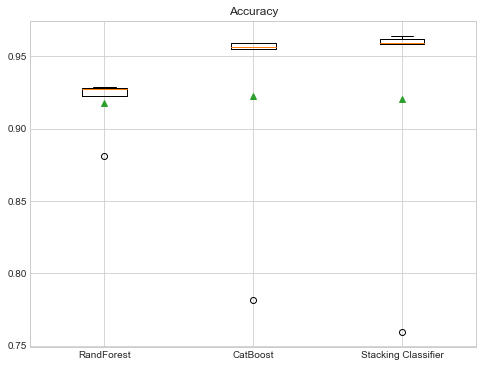

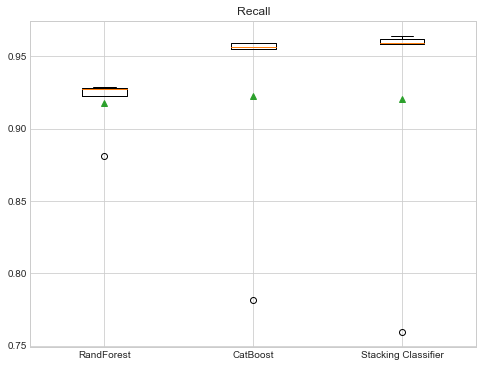

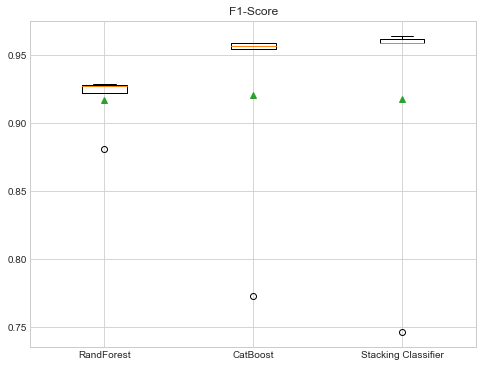

In [129]:
#Stack ensemble model with random forest as meta classifier, the learning classifiers are CatBoost and random forest.
# Lets check 3 scoring parameters to identify the performance better

import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


clf1 = fit_model1.best_estimator_
clf2 = fit_model.best_estimator_

sclf = StackingClassifier(classifiers=[clf1,clf2], 
                          use_probas=True,
                          meta_classifier=clf2)

scores=dict()  
for clf, label in zip([clf1, clf2, sclf], 
                      ['RandForest',
                       'CatBoost',
                      'Stacking Classifier']):
  scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1-score':'f1_macro'
           }
  
  scores[label] = model_selection.cross_validate(clf,  X_smote,Y_smote, 
                                              cv=5, scoring=scoring)
sorted(scores.keys())


modellabel=['RandForest','CatBoost','Stacking Classifier']
resultsacc, resultrecall,resultf1, names = list(), list(), list(), list()
for k in modellabel:
    
    resultsacc.append(scores[k]['test_accuracy'])
    resultrecall.append(scores[k]['test_recall'])
    resultf1.append(scores[k]['test_f1-score'])
    names.append(k)


from matplotlib import pyplot as plt
#fig, ax =plt.subplots(1,3)

plt.boxplot(resultsacc, labels=names, showmeans=True)
plt.title('Accuracy')
plt.show()


plt.boxplot(resultrecall, labels=names, showmeans=True)
plt.title('Recall')
plt.show()

plt.boxplot(resultf1, labels=names, showmeans=True)
plt.title('F1-Score')
plt.show()

In [128]:
final_model

StackingClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x0000025D49B9F3D0>,
                                RandomForestClassifier(max_depth=8,
                                                       n_estimators=800,
                                                       random_state=43)],
                   meta_classifier=<catboost.core.CatBoostClassifier object at 0x0000025D49B9F3D0>,
                   use_probas=True)

# Model Evaluation

In [126]:
fit_model=catalog.load("fit_model")
fit_model1=catalog.load("fit_model1")
final_model=catalog.load("final_model")

[10/09/22 18:36:11] INFO     Loading data from 'fit_model' (PickleDataSet)...                   ]8;id=939056;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=536743;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[10/09/22 18:36:12] INFO     Loading data from 'fit_model1' (PickleDataSet)...                  ]8;id=624026;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=376933;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[10/09/22 18:36:15] INFO     Loading data from 'final_model' (PickleDataSet)...                 ]8;id=902764;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=920148;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [130]:
pd.DataFrame(fit_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_learning_rate,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,...,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,4.385196,0.182837,0.283920,0.015292,6,0.01,300,"{'depth': 6, 'learning_rate': 0.01, 'n_estimat...",0.899531,0.939715,...,0.941048,0.925956,0.022217,2,0.976019,0.992210,0.992247,0.986825,0.007641,4
1,8.628136,1.502120,0.338758,0.061138,6,0.01,500,"{'depth': 6, 'learning_rate': 0.01, 'n_estimat...",0.870052,0.950424,...,0.951427,0.919330,0.045963,3,0.977488,0.995192,0.995236,0.989305,0.008356,2
2,8.484787,0.729923,0.295554,0.002358,8,0.01,300,"{'depth': 8, 'learning_rate': 0.01, 'n_estimat...",0.892071,0.945190,...,0.946634,0.926140,0.029500,1,0.977488,0.994022,0.993787,0.988432,0.007739,3
3,12.510351,1.337612,0.276609,0.013864,8,0.01,500,"{'depth': 8, 'learning_rate': 0.01, 'n_estimat...",0.865961,0.953733,...,0.953794,0.919205,0.049987,4,0.978565,0.996048,0.995905,0.990172,0.008208,1


In [131]:
fit_model.best_params_

{'depth': 8, 'learning_rate': 0.01, 'n_estimators': 500}

In [132]:
fit_model1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 800}

[[10020   666]
 [  368   977]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     10686
           1       0.59      0.73      0.65      1345

    accuracy                           0.91     12031
   macro avg       0.78      0.83      0.80     12031
weighted avg       0.92      0.91      0.92     12031



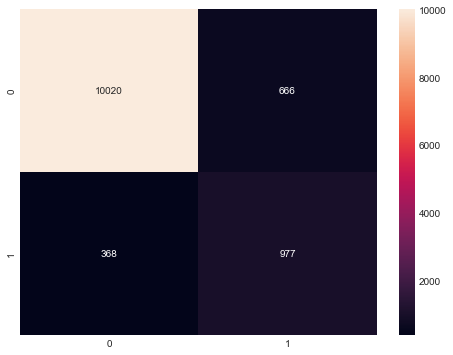

In [136]:
grid_predictionscheck = fit_model.predict(X_test_scaled)

cmctb=confusion_matrix(Y_test,grid_predictionscheck)
sns.heatmap(cmctb,annot=True,fmt='g')
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

In [133]:
grid_predictionscheck = fit_model1.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[9439 1247]
 [ 224 1121]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     10686
           1       0.47      0.83      0.60      1345

    accuracy                           0.88     12031
   macro avg       0.73      0.86      0.77     12031
weighted avg       0.92      0.88      0.89     12031



In [137]:
grid_predictionscheck = final_model.predict(X_test_scaled)
print(confusion_matrix(Y_test,grid_predictionscheck))
print(classification_report(Y_test, grid_predictionscheck))

[[10122   564]
 [  413   932]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10686
           1       0.62      0.69      0.66      1345

    accuracy                           0.92     12031
   macro avg       0.79      0.82      0.81     12031
weighted avg       0.92      0.92      0.92     12031



In [109]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(Y_test, grid_predictionscheck))


0.9267220356412553


In [193]:
classification_report=catalog.load("classification_report")

[09/24/22 22:59:44] INFO     Loading data from 'classification_report' (PickleDataSet)...       ]8;id=739663;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=65767;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [194]:
classification_report

,precision,recall,f1-score,support
0,0.985869,0.979727,0.982788,10753.000000
1,0.837918,0.881847,0.859321,1278.000000
accuracy,0.969329,0.969329,0.969329,0.969329
macro avg,0.911894,0.930787,0.921055,12031.000000
weighted avg,0.970153,0.969329,0.969673,12031.000000


In [13]:
fit_model.best_params_

{'depth': 6, 'learning_rate': 0.01, 'n_estimators': 300}

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     10686
           1       0.62      0.69      0.66      1345

    accuracy                           0.92     12031
   macro avg       0.79      0.82      0.81     12031
weighted avg       0.92      0.92      0.92     12031



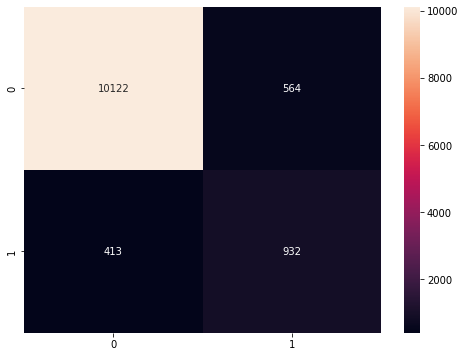

In [22]:
grid_predictionscheck = final_model.predict(X_test_scaled)

cmctb=confusion_matrix(Y_test,grid_predictionscheck)
sns.heatmap(cmctb,annot=True,fmt='g')
print(classification_report(Y_test, grid_predictionscheck))

# Model Explanation

In [138]:
import shap

In [139]:
# Fits the explainer
explainer = shap.TreeExplainer(fit_model.best_estimator_)
# Calculates the SHAP values - It takes some time
shap_values = explainer.shap_values(X_test_scaled)

In [140]:
train_df1=train_df.drop('deposit', axis=1)
x_test_df=pd.DataFrame(X_test_scaled,columns=train_df1.columns)

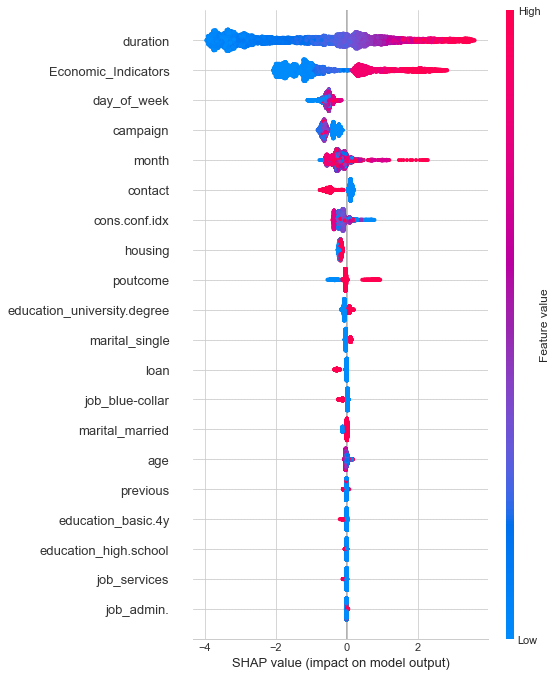

In [141]:
shap.summary_plot(shap_values,x_test_df)

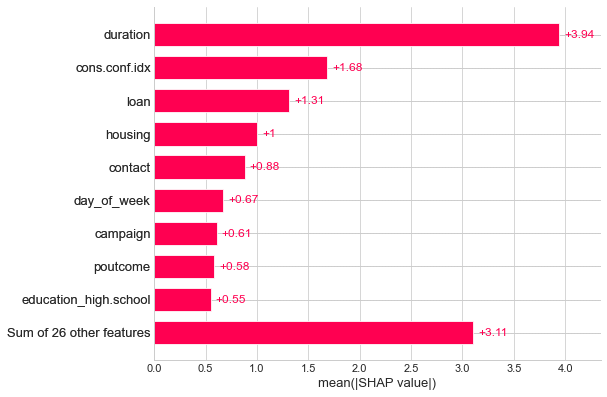

In [199]:
shap.plots.bar(shap_values)

In [121]:
# Fits the explainer
explainer1 = shap.Explainer(fit_model.predict, X_test_scaled)
# Calculates the SHAP values - It takes some time
shap_values1 = explainer1(X_test_scaled)


Permutation explainer: 12032it [35:05,  5.70it/s]                                                                                                   


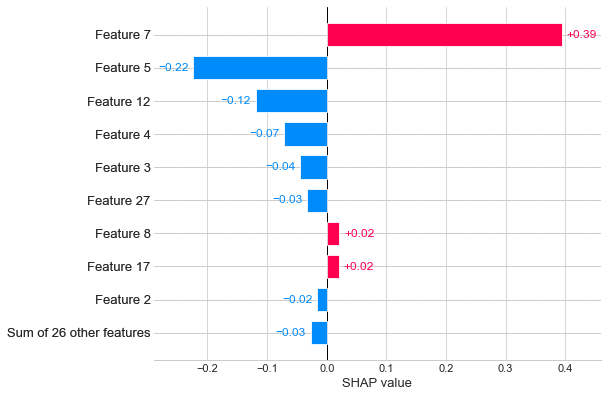

In [122]:
shap.plots.bar(shap_values1[0])

# Verification of Kedro Datasets

In [202]:
customer_final=catalog.load("customer_final")
inference_final=catalog.load("inference_final")

[09/24/22 23:02:01] INFO     Loading data from 'customer_final' (SQLTableDataSet)...            ]8;id=342870;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=49358;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[09/24/22 23:02:02] INFO     Loading data from 'inference_final' (SQLTableDataSet)...           ]8;id=4785;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=331361;file://C:\Users\Nijel\Anaconda3\envs\thesis-env\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [203]:
inference_final['Customer']=customer_final['Customer']

In [204]:
customer_final

,Customer
0,110001013
1,110001018
2,110001012
3,110001023
4,110001024
...,...
1995,110009978
1996,110009979
1997,110009982
1998,110009987
